# R Final Project
## Monish Tammareddy - mt575
## Narella Vamshi - nv345
## Saksham Jain - sj764

# Importing all the required Libraries

In [123]:
import pandas as pd_rp
import numpy as np_rp
import matplotlib.pyplot as plt_rp
import seaborn as sns_rp
import plotly.express as px_rp
import math
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import warnings
pd_rp.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# We will be using regression algorithms as it is a price prediction problem and   we know that in these cases we use Regression algorithms

# Loading Training Dataset 

In [124]:
df_rp = pd_rp.read_csv('/Users/narellavamshi/Downloads/train.csv',index_col='Id')
df_rp_t= pd_rp.read_csv('/Users/narellavamshi/Downloads/test.csv',index_col='Id')
df_rp.head()


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd        NaN   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [125]:
df_rp_t.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961   
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1463          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
1464          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1465          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1461         0.0        TA        TA     CBlock       TA       TA   
1462       108.0        TA        TA     CBlock       TA       TA   
1463         0.0        TA        TA      PConc       Gd       TA   
1464        20.0        TA        TA      PConc       TA       TA   
1465         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1461           No          Rec       468.0          LwQ       144.0   
1462           No          ALQ       923.0          Unf         0.0   
1463           No          GLQ       791.0          Unf         0.0   
1464           No          GLQ       602.0          Unf         0.0   
1465           No          ALQ       263.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1461      270.0        882.0    GasA        TA          Y      SBrkr   
1462      406.0       1329.0    GasA        TA          Y      SBrkr   
1463      137.0        928.0    GasA        Gd          Y      SBrkr   
1464      324.0        926.0    GasA        Ex          Y      SBrkr   
1465     1017.0       1280.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896           0.0           0.0   
1462      1329         0             0       1329           0.0           0.0   
1463       928       701             0       1629           0.0           0.0   
1464       926   

In [126]:
df_rp.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1456         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1457         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1459         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1460         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1456       Norm     1Fam     2Story            6            5       1999   
1457       Norm     1Fam     1Story            6            6       1978   
1458       Norm     1Fam     2Story            7            9       1941   
1459       Norm     1Fam     1Story            5            6       1950   
1460       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1456          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1988     Gable  CompShg     Plywood     Plywood      Stone   
1458          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1459          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1460          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1456         0.0        TA        TA      PConc       Gd       TA   
1457       119.0        TA        TA     CBlock       Gd       TA   
1458         0.0        Ex        Gd      Stone       TA       Gd   
1459         0.0        TA        TA     CBlock       TA       TA   
1460         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1456           No          Unf           0          Unf           0   
1457           No          ALQ         790          Rec         163   
1458           No          GLQ         275          Unf           0   
1459           Mn          GLQ          49          Rec        1029   
1460           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1456        953          953    GasA        Ex          Y      SBrkr   
1457        589         1542    GasA        TA          Y      SBrkr   
1458        877         1152    GasA        Ex          Y      SBrkr   
1459          0         1078    GasA        Gd          Y      FuseA   
1460        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1456       953       694             0       1647             0             0   
1457      2073         0             0       2073             1             0   
1458      1188      1152             0       2340             0             0   
1459      1078   

# Dataset Shape and MetaData

In [127]:
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [128]:
df_rp.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

# Data Cleaning
## Dealing with missing values

<Axes: ylabel='Id'>

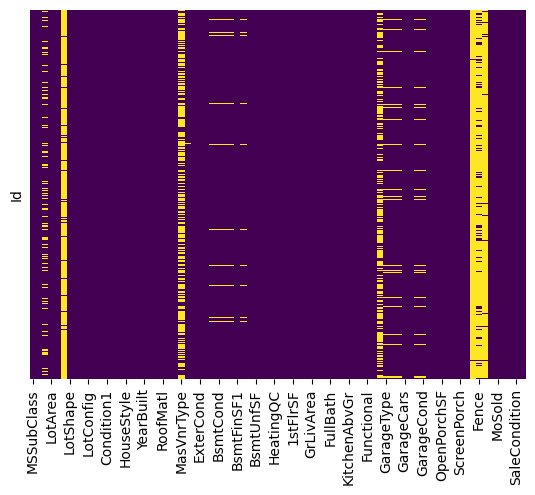

In [129]:
sns_rp.heatmap(df_rp.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [130]:
df_rp.isna()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1          False     False        False    False   False   True     False   
2          False     False        False    False   False   True     False   
3          False     False        False    False   False   True     False   
4          False     False        False    False   False   True     False   
5          False     False        False    False   False   True     False   
...          ...       ...          ...      ...     ...    ...       ...   
1456       False     False        False    False   False   True     False   
1457       False     False        False    False   False   True     False   
1458       False     False        False    False   False   True     False   
1459       False     False        False    False   False   True     False   
1460       False     False        False    False   False   True     False   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                             
1           False      False      False      False         False       False   
2           False      False      False      False         False       False   
3           False      False      False      False         False       False   
4           False      False      False      False         False       False   
5           False      False      False      False         False       False   
...           ...        ...        ...        ...           ...         ...   
1456        False      False      False      False         False       False   
1457        False      False      False      False         False       False   
1458        False      False      False      False         False       False   
1459        False      False      False      False         False       False   
1460        False      False      False      False         False       False   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1          False     False       False        False        False      False   
2          False     False       False        False        False      False   
3          False     False       False        False        False      False   
4          False     False       False        False        False      False   
5          False     False       False        False        False      False   
...          ...       ...         ...          ...          ...        ...   
1456       False     False       False        False        False      False   
1457       False     False       False        False        False      False   
1458       False     False       False        False        False      False   
1459       False     False       False        False        False      False   
1460       False     False       False        False        False      False   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
Id                                                                              
1            False      False     False        False        False       False   
2            False      False     False        False        False        True   
3            False      False     False        False        False       False   
4            False      False     False        False        False        True   
5            False      False     False        False        False       False   
...            ...        ...       ...          ...          ...         ...   
1456         False      False     False        False        False        True   
1457         False      False     False        False        False       False   
1458         False      False     False        False        False        True   
1459         False      False     False     

# Determining the action plan to deal with the NaN values

## Calculating the ratio of the Nan Values and hence we can determine what to substitute instead of them or remove them if required

In [131]:
print("Ratio of NaN(Not a NULL) in each Column")
print("**********************************************")
nan_ratio_rp = df_rp.isna().mean() 
nan_ratio_rp = nan_ratio_rp[nan_ratio_rp > 0]

for col_rp, ratio_rp in nan_ratio_rp.items():
    print(f"{col_rp} : {ratio_rp:.2f}")


Ratio of NaN(Not a NULL) in each Column
**********************************************
LotFrontage : 0.18
Alley : 0.94
MasVnrType : 0.60
MasVnrArea : 0.01
BsmtQual : 0.03
BsmtCond : 0.03
BsmtExposure : 0.03
BsmtFinType1 : 0.03
BsmtFinType2 : 0.03
Electrical : 0.00
FireplaceQu : 0.47
GarageType : 0.06
GarageYrBlt : 0.06
GarageFinish : 0.06
GarageQual : 0.06
GarageCond : 0.06
PoolQC : 1.00
Fence : 0.81
MiscFeature : 0.96


## Hence if the ratio is close to 1 then we have to surely take some action regarding that feature/column

## Dropping some of the columns because either they have lot of NaN values or else if NaN values are replaced then it may lead to negative performance 

In [132]:
df_rp.drop(columns=['MasVnrType','PoolQC','PoolArea','BsmtHalfBath','KitchenAbvGr','Utilities'],inplace=True)

## Replacing the NaN values by specific parameters such as numbers, mean, mode etc.

In [133]:
df_rp['LotFrontage'] = df_rp['LotFrontage'].fillna(0)
df_rp['Alley'] = df_rp['Alley'].fillna("No Alley Acess")
df_rp['MasVnrArea'] = df_rp['MasVnrArea'].fillna(df_rp['MasVnrArea'].mean())
df_rp['LotFrontage'] = df_rp['LotFrontage'].fillna(0)
df_rp['BsmtQual'] = df_rp['BsmtQual'].fillna("No Basment")
df_rp['BsmtCond'] = df_rp['BsmtCond'].fillna("No Basment")
df_rp['BsmtExposure'] = df_rp['BsmtExposure'].fillna("No Basment")
df_rp['BsmtFinType1'] = df_rp['BsmtFinType1'].fillna("No Basment")
df_rp['BsmtFinType2'] = df_rp['BsmtFinType2'].fillna("No Basment")
df_rp['Electrical'] = df_rp['Electrical'].fillna(df_rp['Electrical'].mode()[0])
df_rp['FireplaceQu'] = df_rp['FireplaceQu'].fillna("No Fireplace")
df_rp['GarageType'] = df_rp['GarageType'].fillna("No Garage")
df_rp['GarageYrBlt'] = df_rp['GarageYrBlt'].fillna(0)
df_rp['GarageFinish'] = df_rp['GarageFinish'].fillna("No Garage")
df_rp['GarageQual'] = df_rp['GarageQual'].fillna("No Garage")
df_rp['GarageCond'] = df_rp['GarageCond'].fillna("No Garage")
df_rp['Fence'] = df_rp['Fence'].fillna("No Fence")
df_rp['MiscFeature'] = df_rp['MiscFeature'].fillna("No Miscellaneous Feature")

## Removing Outliers

## Here we are using zscore threshold as 3 because it covers around 99.73% of the data and rest we are considering as outliers

In [134]:
from scipy.stats import zscore

def remove_outlier_zscore_rp(df_rp, x, zscore_thres=3):
    df_rp[f'{x}_zscore'] = zscore(df_rp[f'{x}'])
    df_rp.drop(df_rp[(df_rp[f'{x}_zscore'] >= zscore_thres) | (df_rp[f'{x}_zscore'] <= -zscore_thres)].index, inplace=True)
    df_rp.drop(columns=[f'{x}_zscore'], inplace=True)
    

## Removing the outliers using the above user defined function

In [135]:
columns_rps = df_rp.select_dtypes('number').columns.tolist()
for col_rp in columns_rps:
    remove_outlier_zscore_rp(df_rp, col_rp)

In [136]:
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 1 to 1457
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1001 non-null   int64  
 1   MSZoning       1001 non-null   object 
 2   LotFrontage    1001 non-null   float64
 3   LotArea        1001 non-null   int64  
 4   Street         1001 non-null   object 
 5   Alley          1001 non-null   object 
 6   LotShape       1001 non-null   object 
 7   LandContour    1001 non-null   object 
 8   LotConfig      1001 non-null   object 
 9   LandSlope      1001 non-null   object 
 10  Neighborhood   1001 non-null   object 
 11  Condition1     1001 non-null   object 
 12  Condition2     1001 non-null   object 
 13  BldgType       1001 non-null   object 
 14  HouseStyle     1001 non-null   object 
 15  OverallQual    1001 non-null   int64  
 16  OverallCond    1001 non-null   int64  
 17  YearBuilt      1001 non-null   int64  
 18  YearRemodAdd 

<Axes: ylabel='Id'>

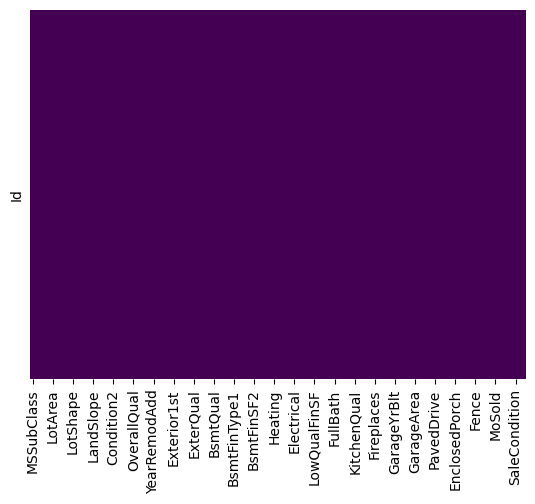

In [137]:
sns_rp.heatmap(df_rp.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Now we can see that the heatmap has no marks as we have dealt with all the NaN or null values in the dataframe

In [138]:
df_rp.shape

(1001, 74)

In [139]:
df_rp.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1001.000000  1001.000000   1001.000000  1001.000000  1001.000000   
mean     55.024975    55.664336   9289.864136     6.053946     5.524476   
std      39.801688    31.676193   3830.783887     1.253430     0.985723   
min      20.000000     0.000000   1300.000000     2.000000     3.000000   
25%      20.000000    40.000000   7252.000000     5.000000     5.000000   
50%      50.000000    63.000000   9120.000000     6.000000     5.000000   
75%      70.000000    76.000000  11040.000000     7.000000     6.000000   
max     180.000000   152.000000  36500.000000    10.000000     8.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1001.000000   1001.000000  1001.000000  1001.000000  1001.000000   
mean   1975.368631   1985.549451    84.297814   416.560440    22.208791   
std      27.635864     20.522519   132.001834   397.369021    84.511924   
min    1890.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1957.000000   1968.000000     0.000000     0.000000     0.000000   
50%    1977.000000   1995.000000     0.000000   398.000000     0.000000   
75%    2002.000000   2004.000000   143.000000   690.000000     0.000000   
max    2009.000000   2010.000000   640.000000  1573.000000   532.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1001.000000  1001.000000  1001.000000  1001.000000   1001.000000   
mean    568.288711  1007.057942  1103.766234   322.947053      0.292707   
std     427.616819   365.825514   319.603944   404.584550      4.682226   
min       0.000000     0.000000   438.000000     0.000000      0.000000   
25%     239.000000   791.000000   864.000000     0.000000      0.000000   
50%     484.000000   960.000000  1052.000000     0.000000      0.000000   
75%     810.000000  1234.000000  1314.000000   703.000000      0.000000   
max    1869.000000  2136.000000  2136.000000  1427.000000     80.000000   

         GrLivArea  BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  \
count  1001.000000   1001.000000  1001.000000  1001.000000   1001.000000   
mean   1427.005994      0.381618     1.565435     0.369630      2.812188   
std     406.913091      0.486027     0.515717     0.482946      0.688978   
min     438.000000      0.000000     0.000000     0.000000      1.000000   
25%    1113.000000      0.000000     1.000000     0.000000      2.000000   
50%    1414.000000      0.000000     2.000000     0.000000      3.000000   
75%    1682.000000      1.000000     2.000000     1.000000      3.000000   
max    2727.000000      1.000000     3.000000     1.000000      5.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean       6.278721     0.546454  1979.672328     1.810190   479.136863   
std        1.346565     0.595055    24.248598     0.589861   166.960134   
min        3.000000     0.000000  1910.000000     1.000000   160.000000   
25%        5.000000     0.000000  1962.000000     1.000000   352.000000   
50%        6.000000     0.000000  1983.000000     2.000000   474.000000   
75%        7.000000     1.000000  2003.000000     2.000000   576.000000   
max       10.000000     2.000000  2010.000000     3.000000   954.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1001.000000  1001.000000    1001.000000  1001.000000  1001.000000   
mean     88.885115    39.817183      13.250749     0.118881     5.208791   
std     106.565312    49.922235      40.553644     3.119432    26.049671   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    62.000000       0.000000     0.000000     0.000000   
max     441

# Analysis and Visualization

In [140]:
col_rps = df_rp.columns
col_rps

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Sc

# Plotting the histogram for features vs y_count values

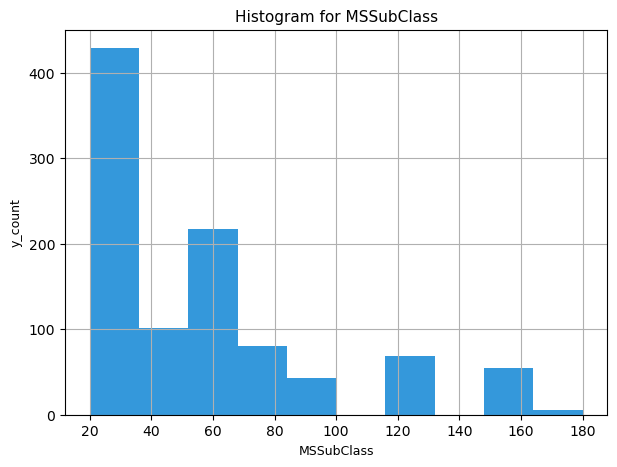

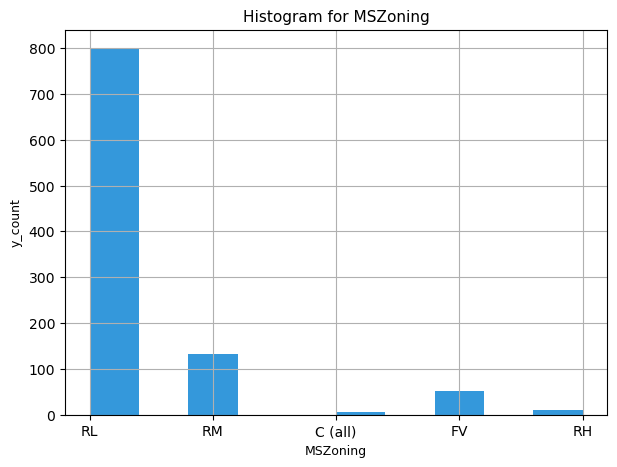

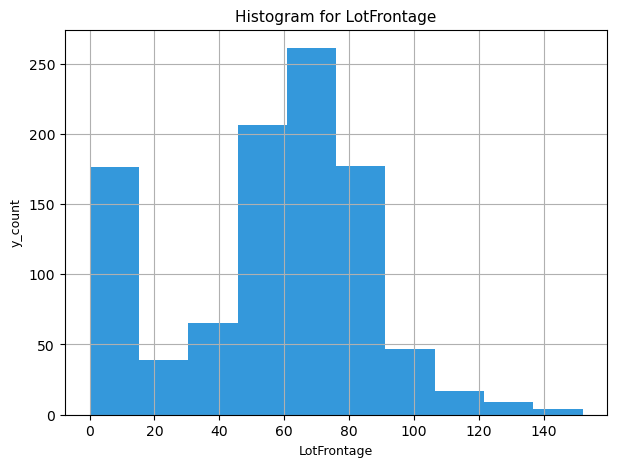

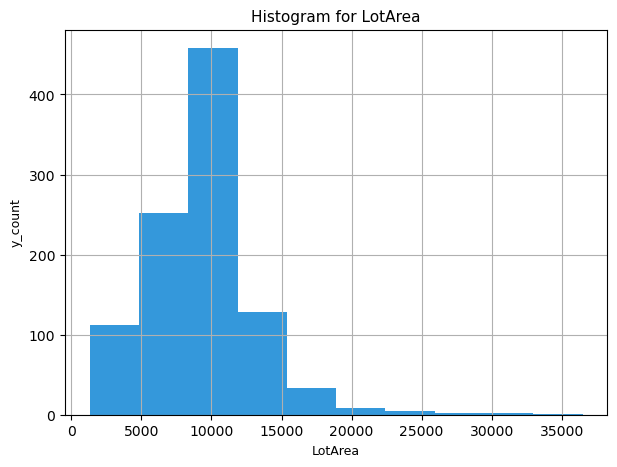

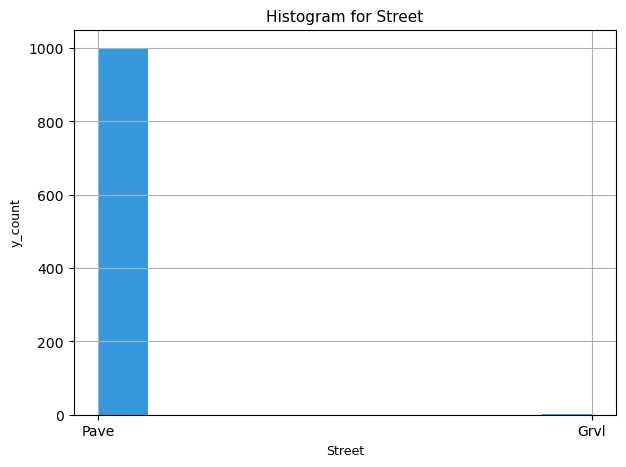

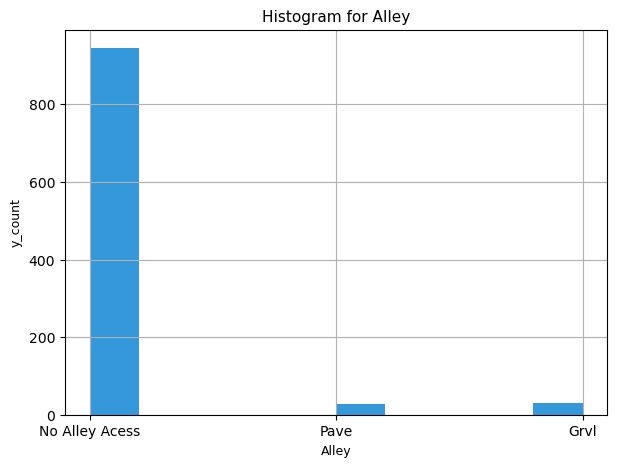

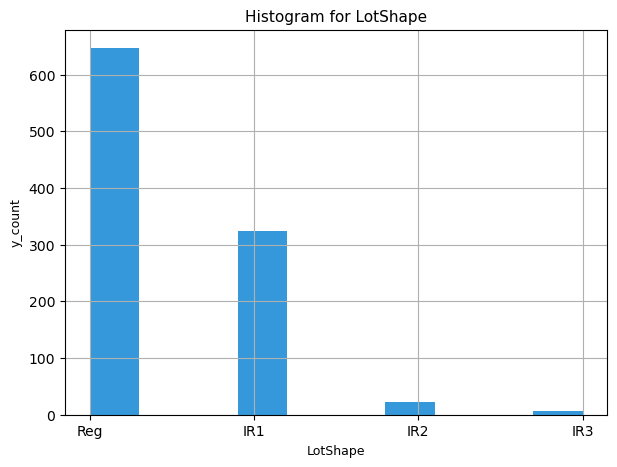

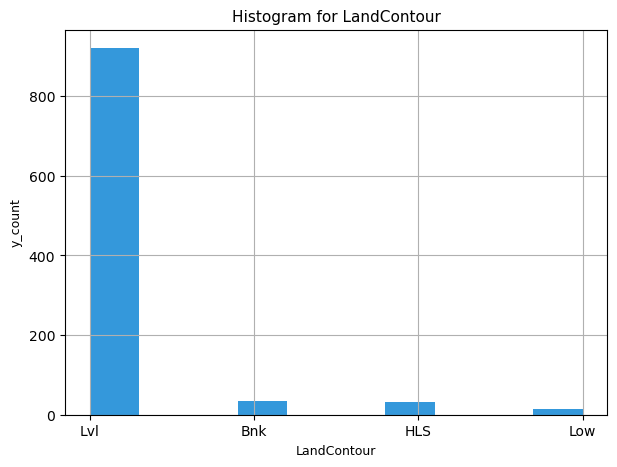

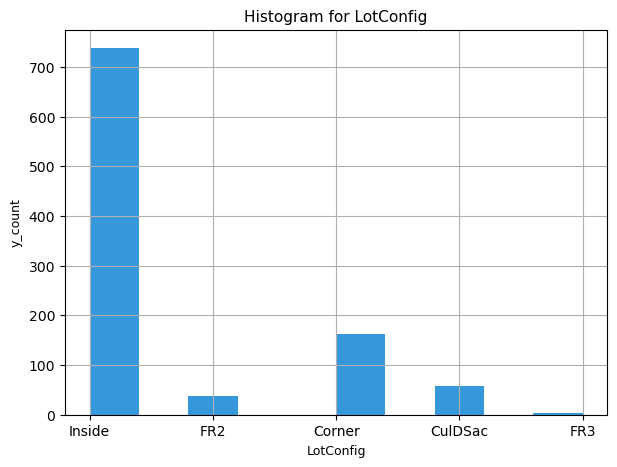

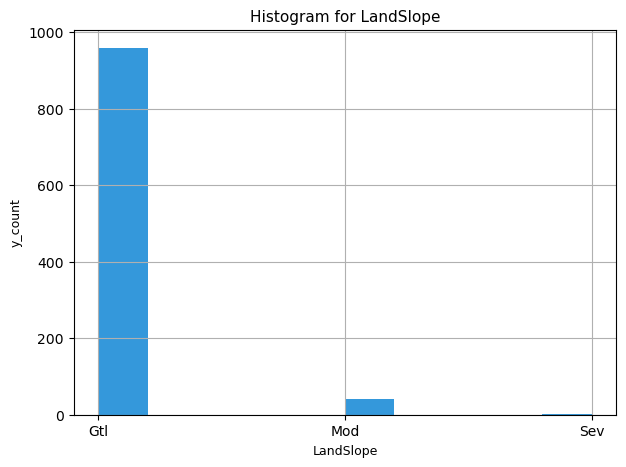

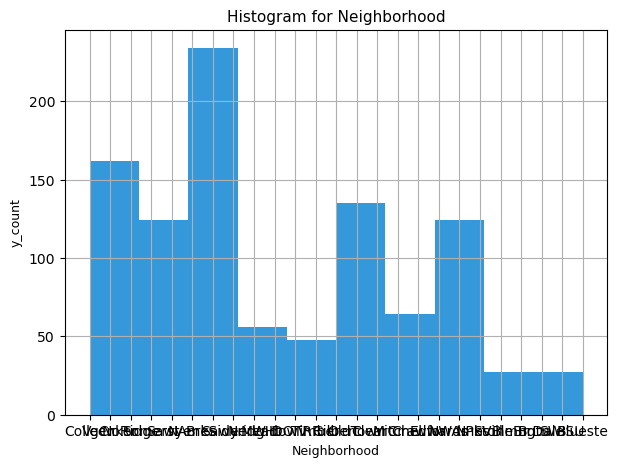

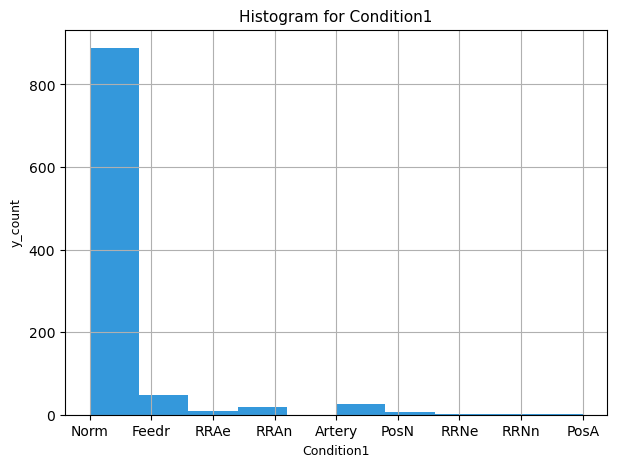

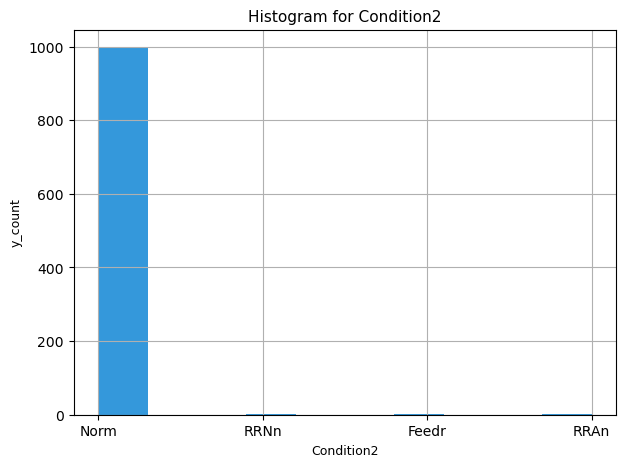

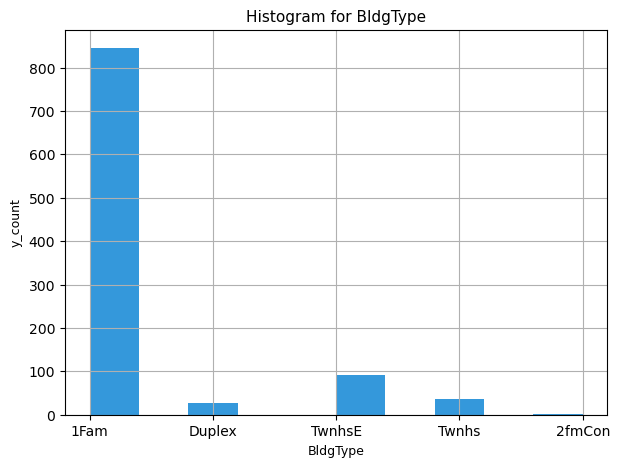

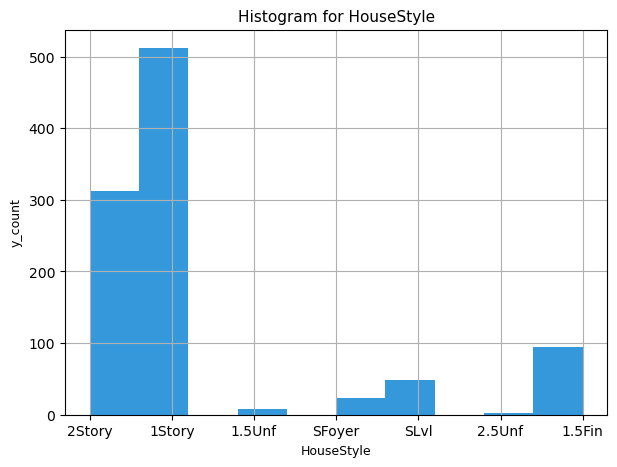

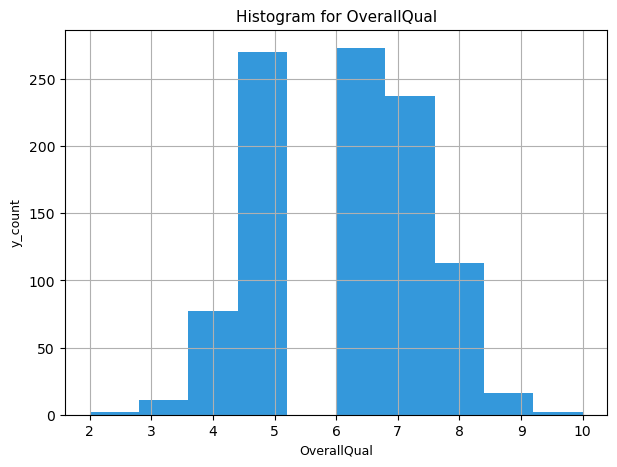

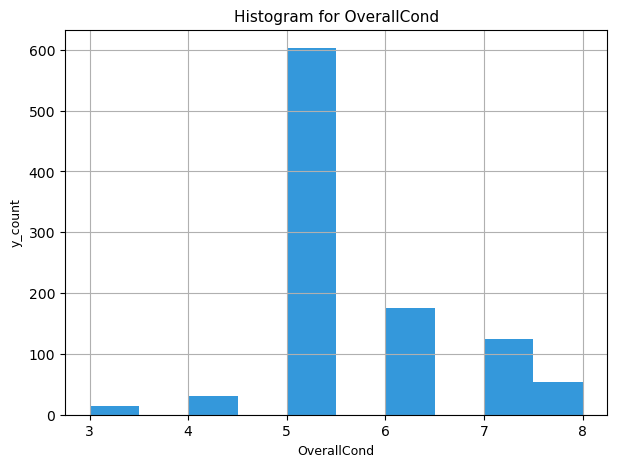

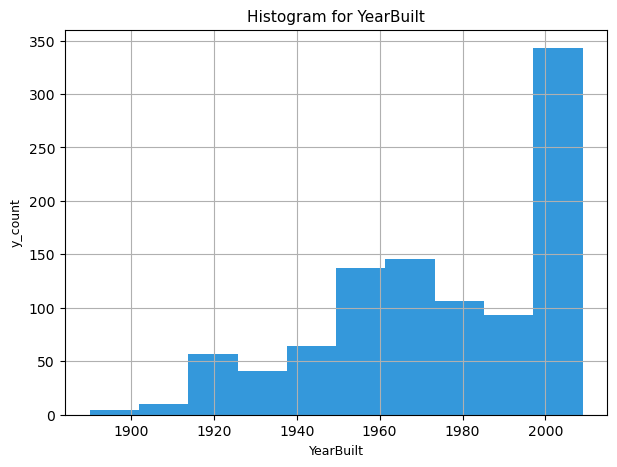

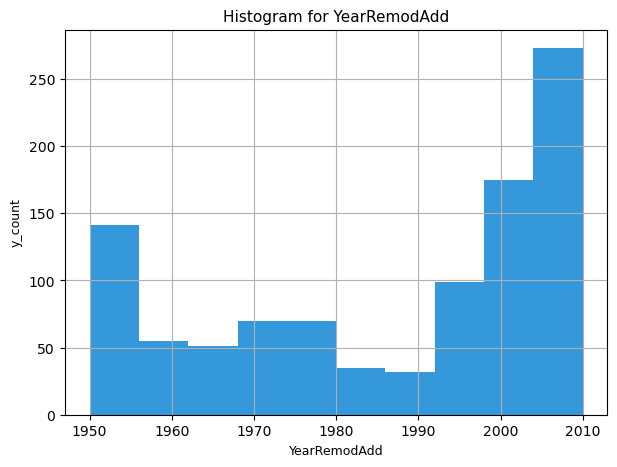

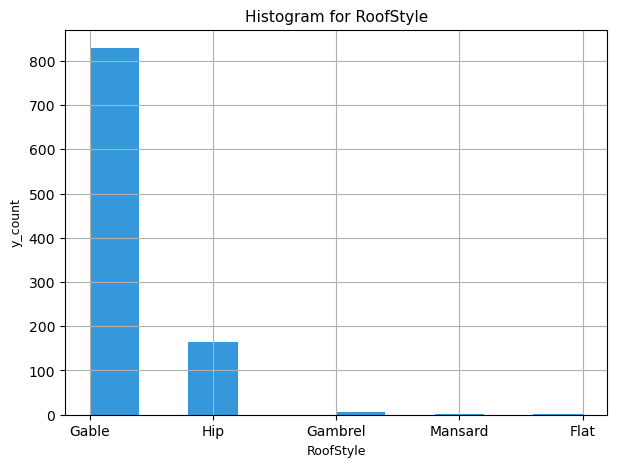

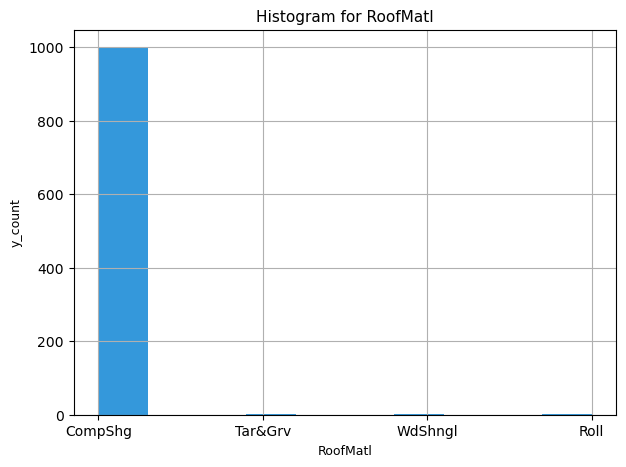

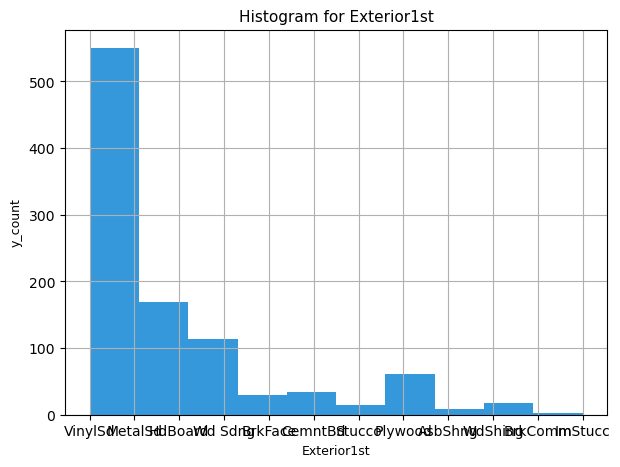

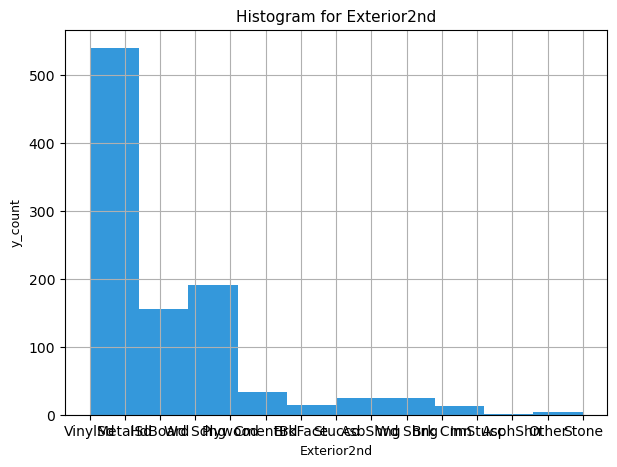

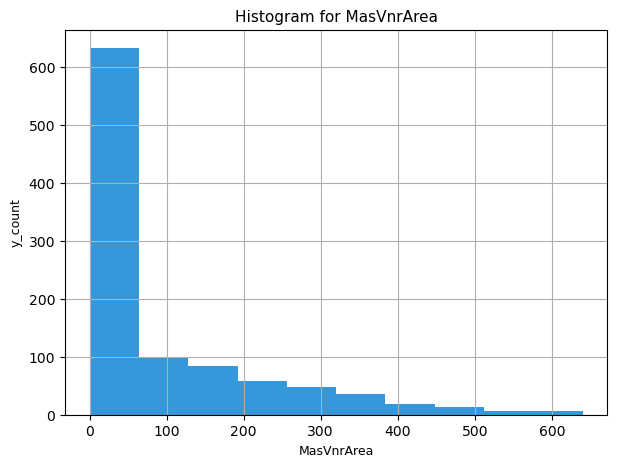

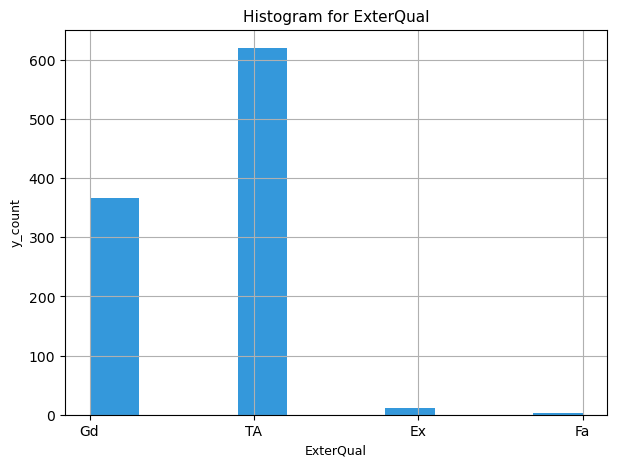

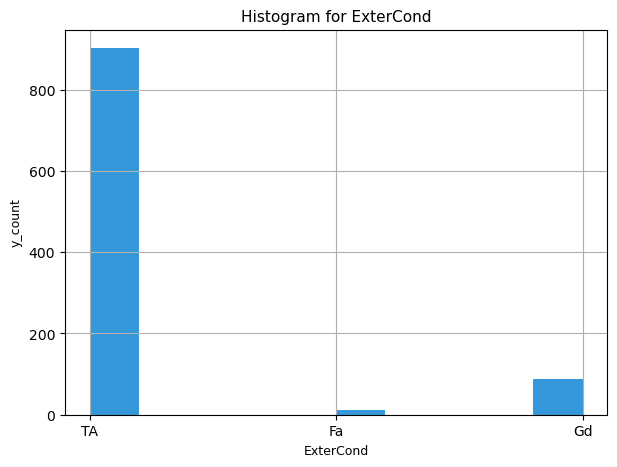

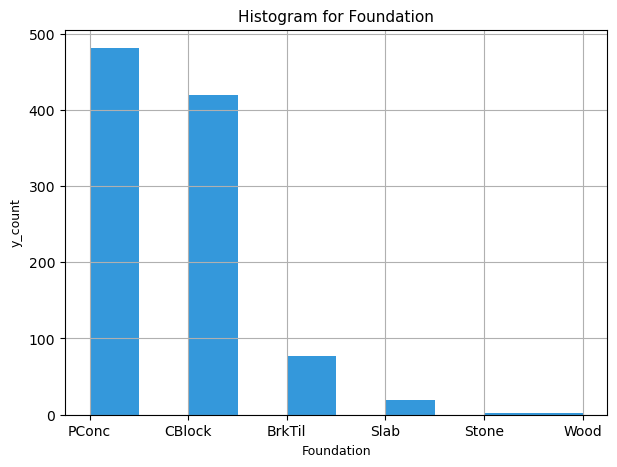

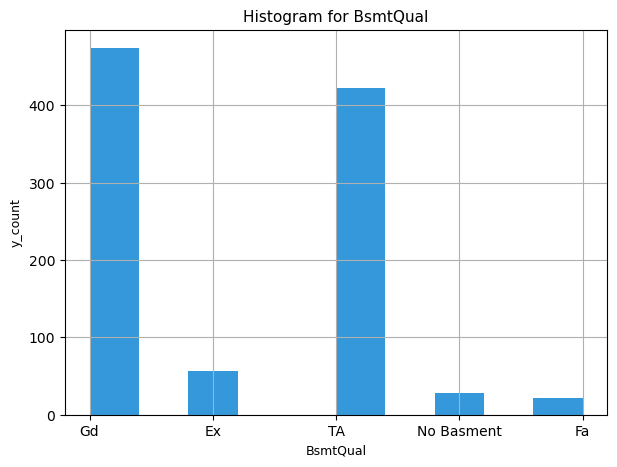

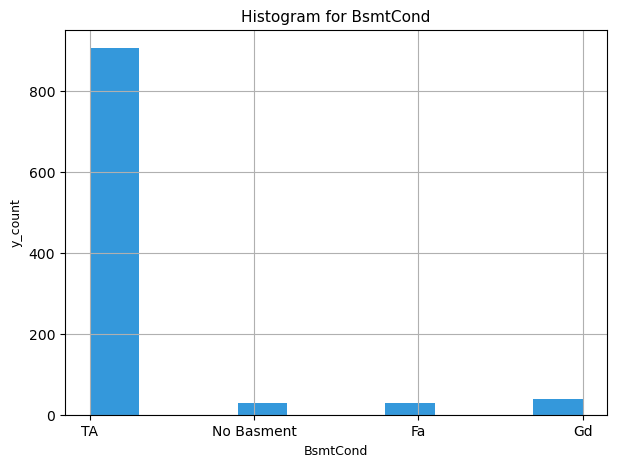

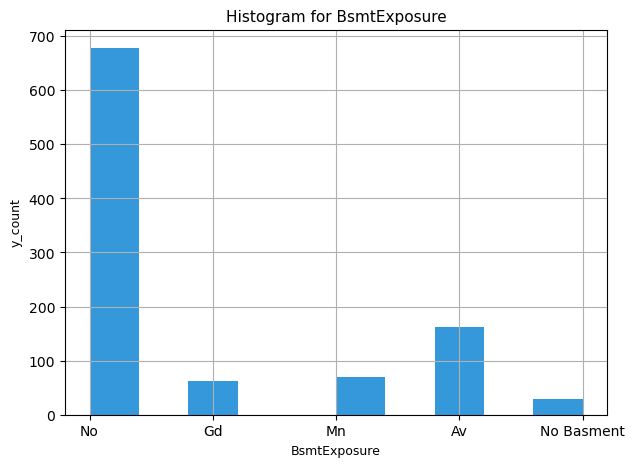

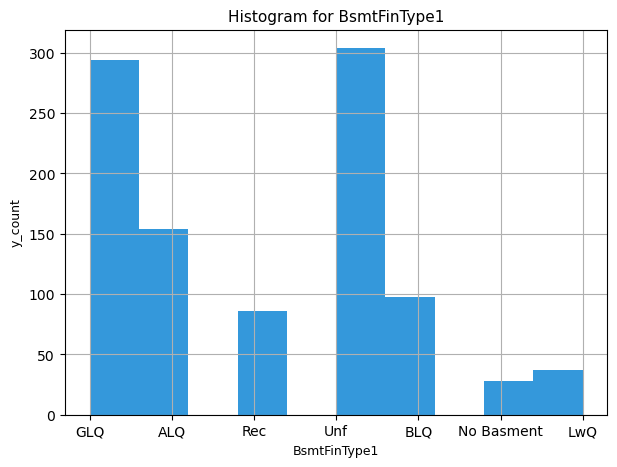

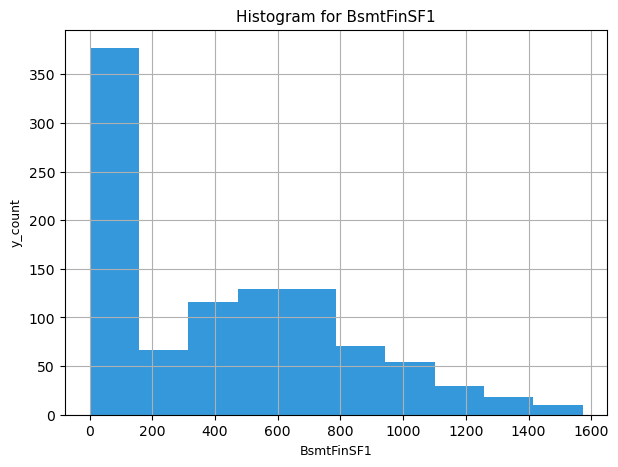

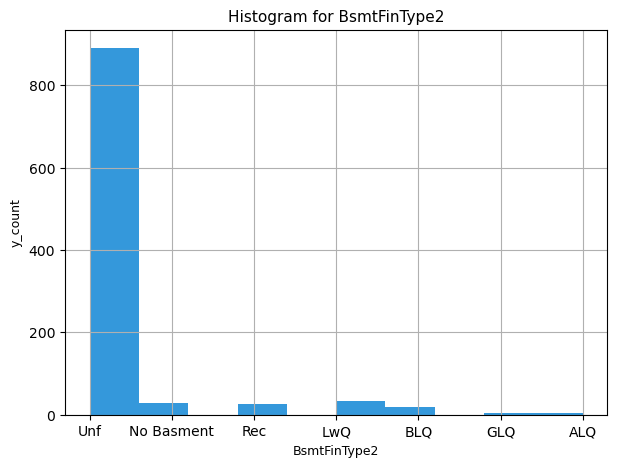

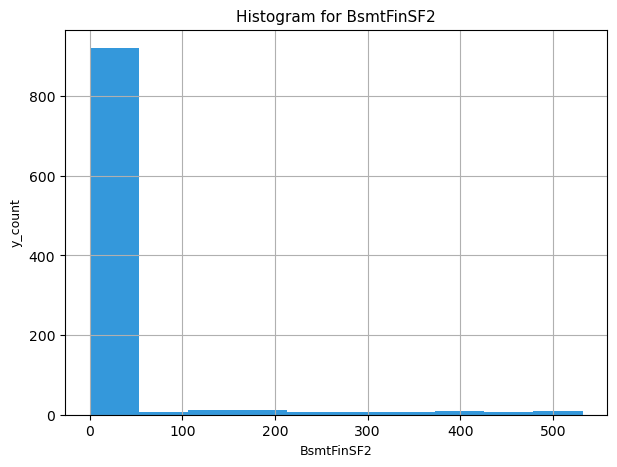

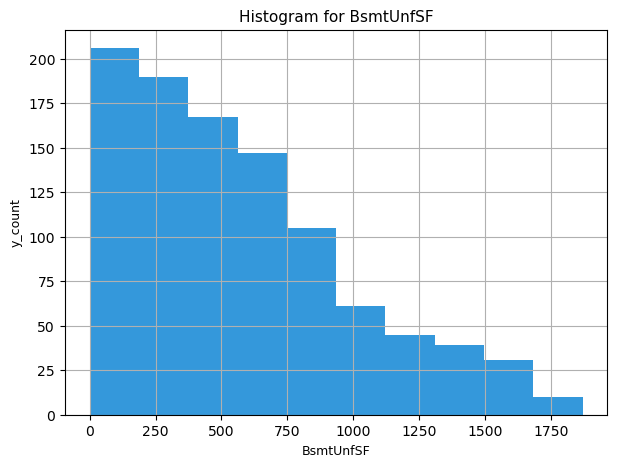

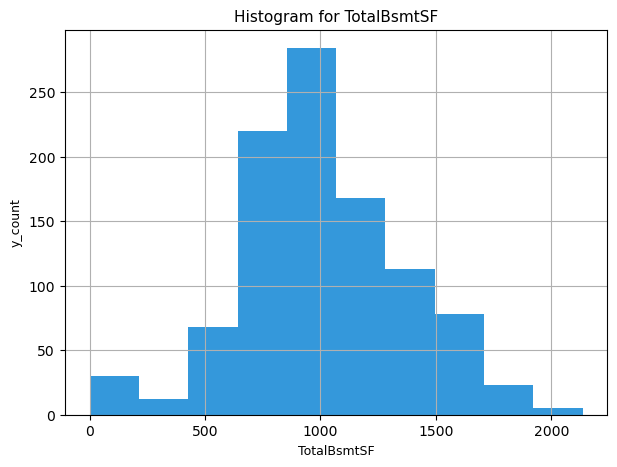

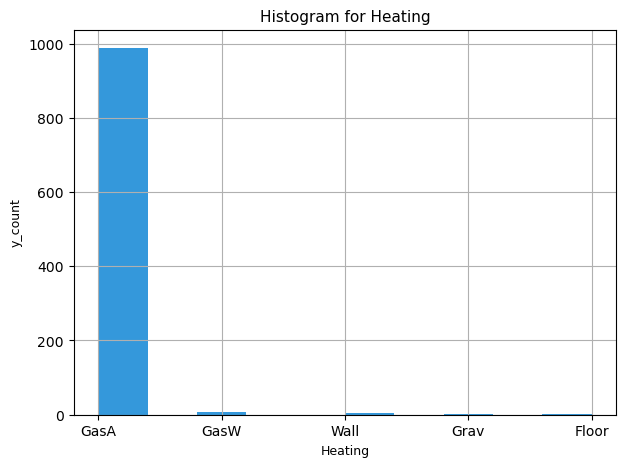

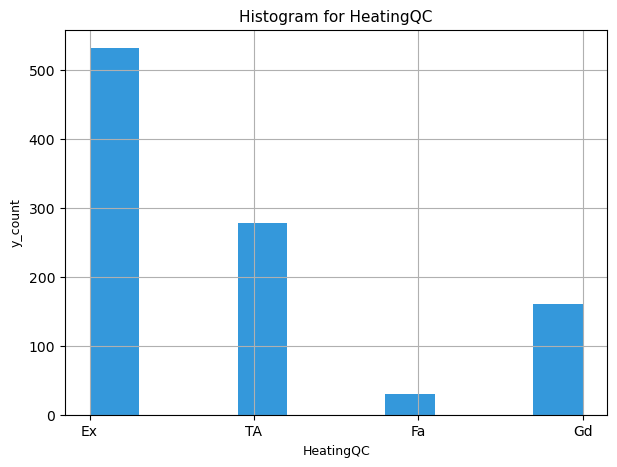

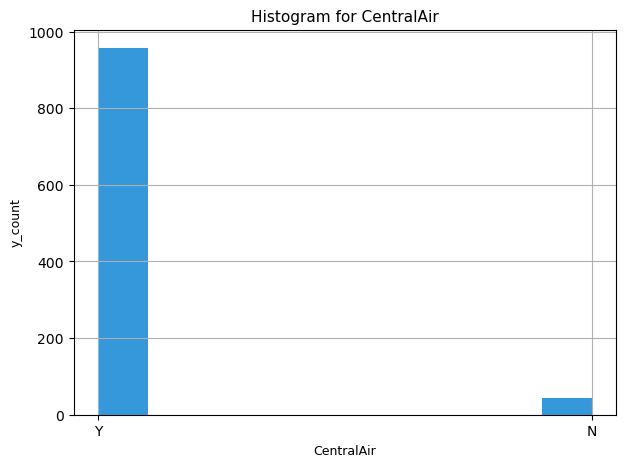

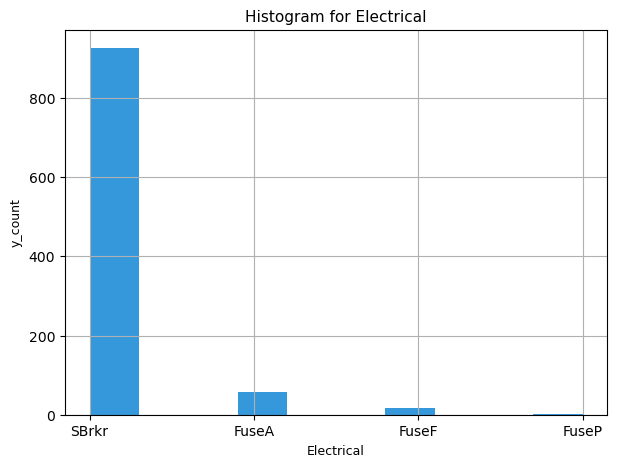

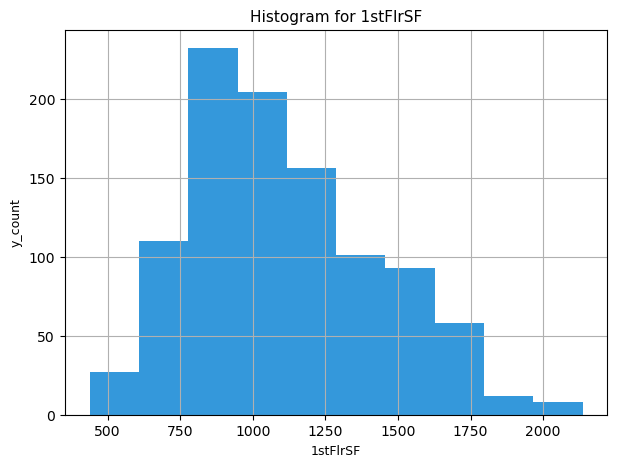

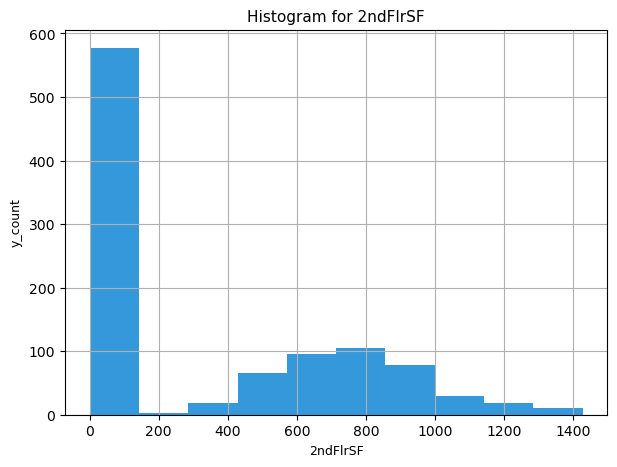

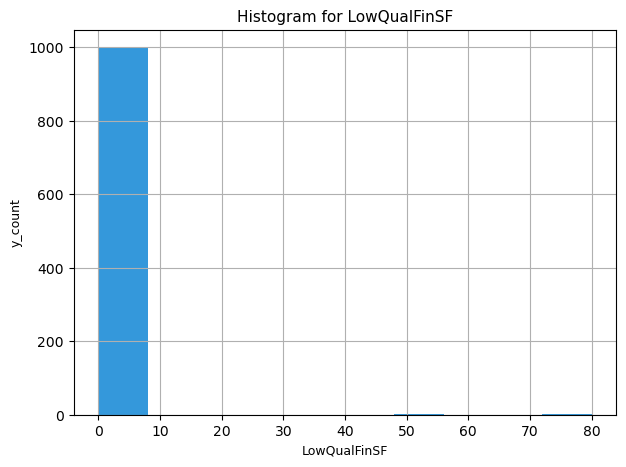

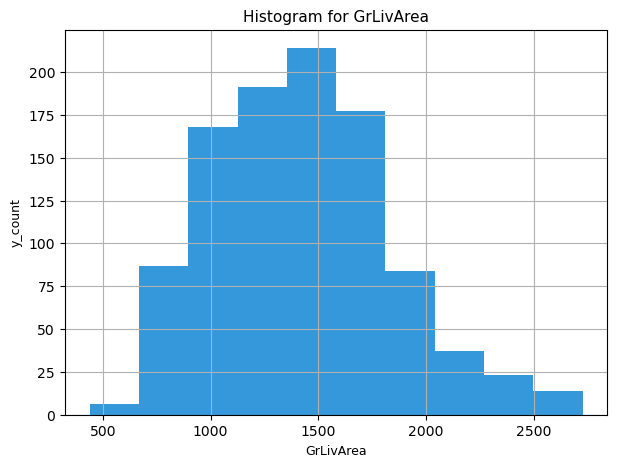

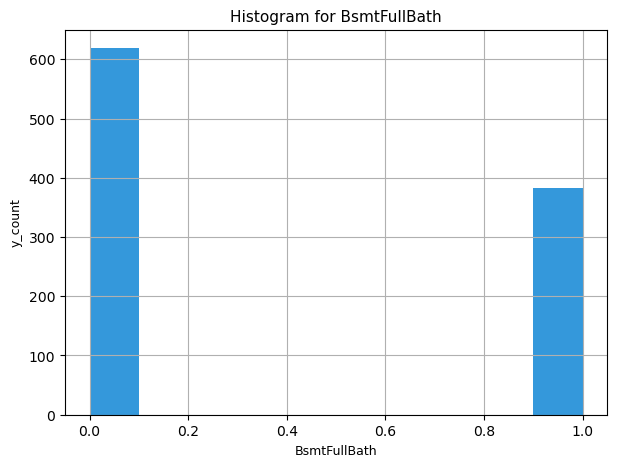

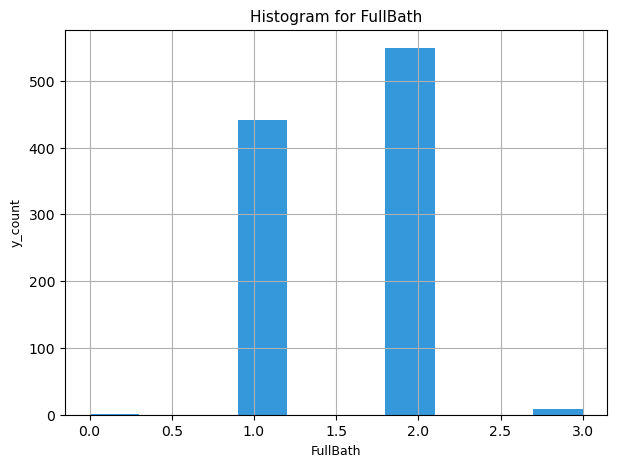

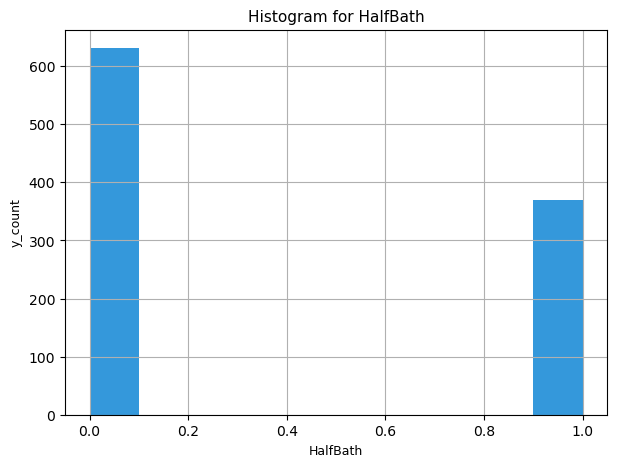

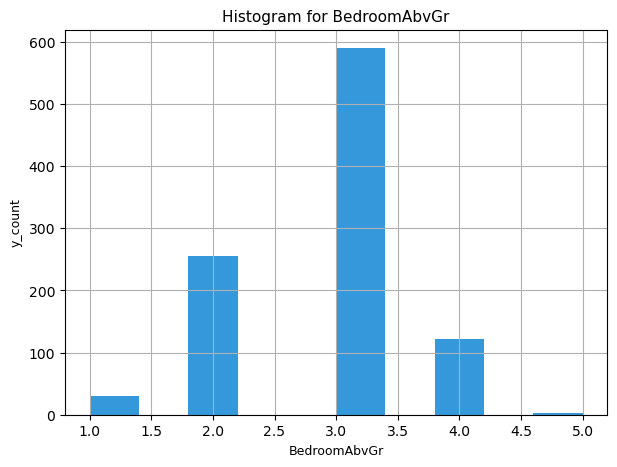

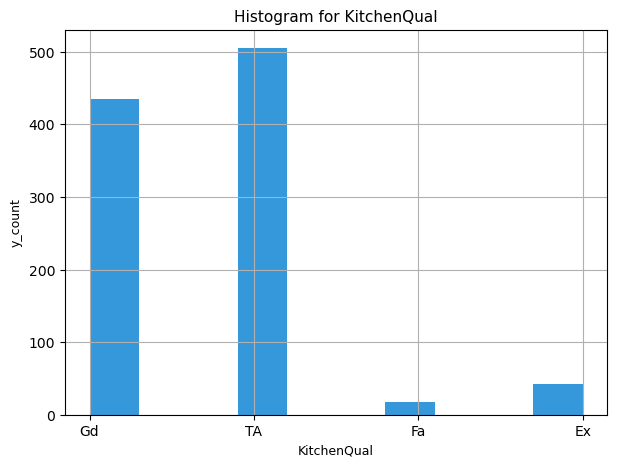

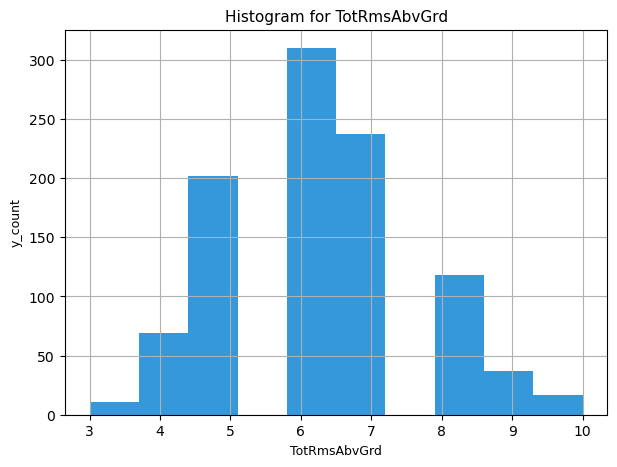

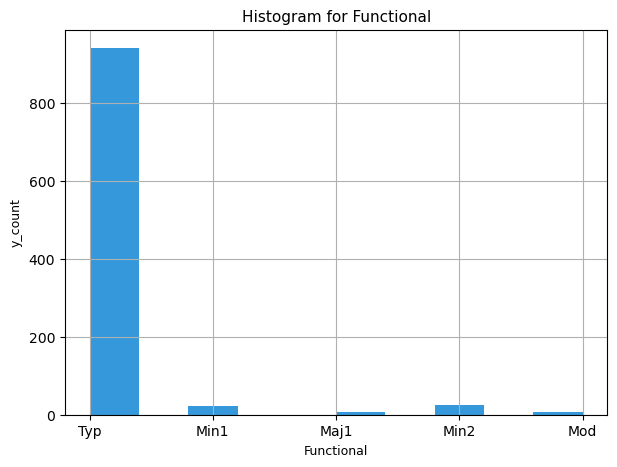

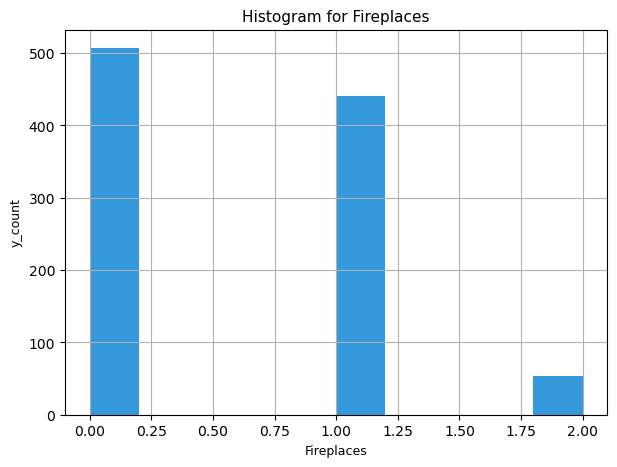

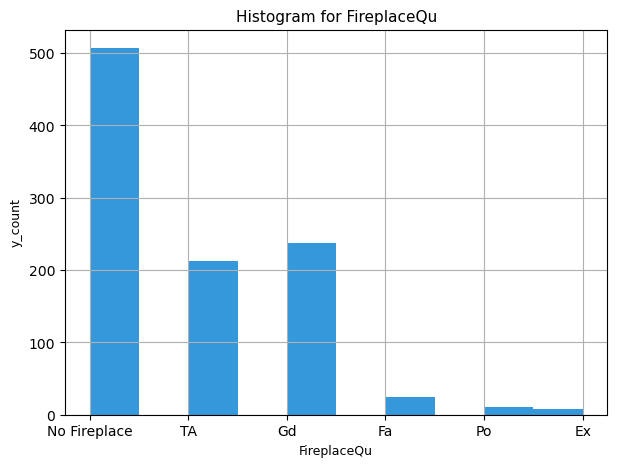

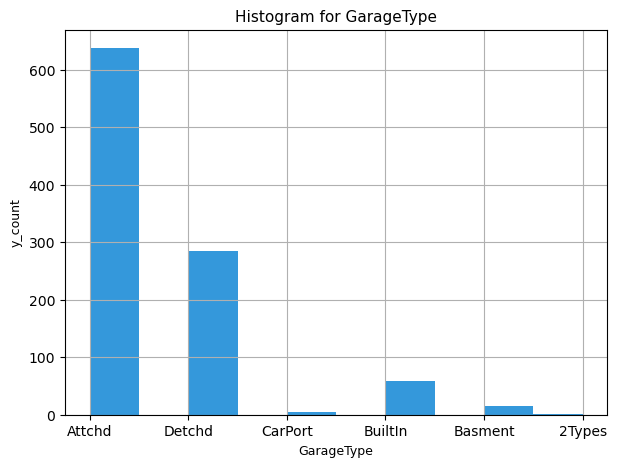

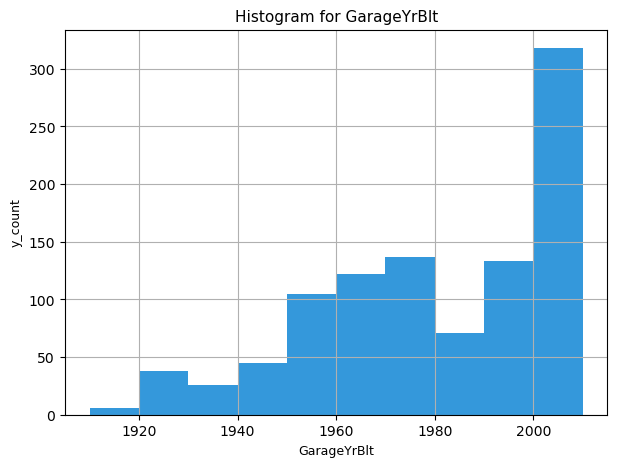

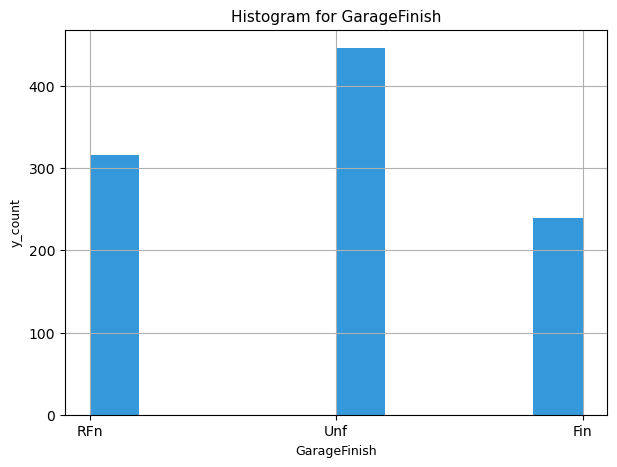

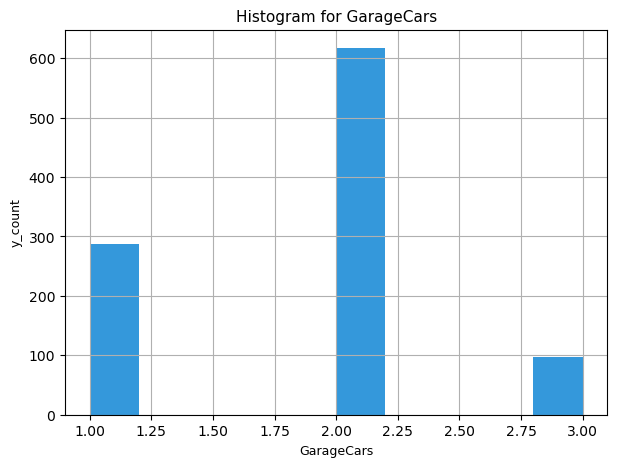

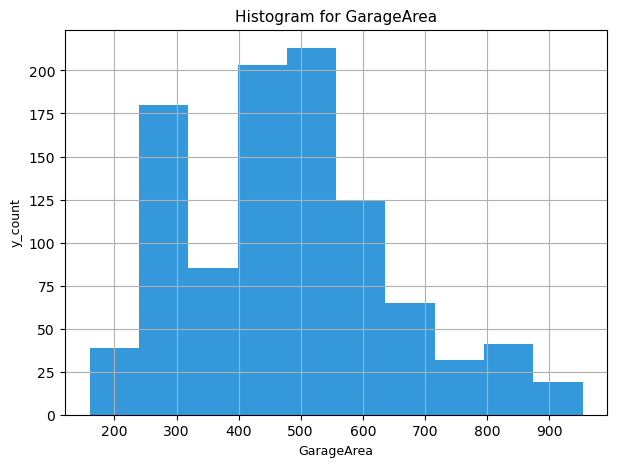

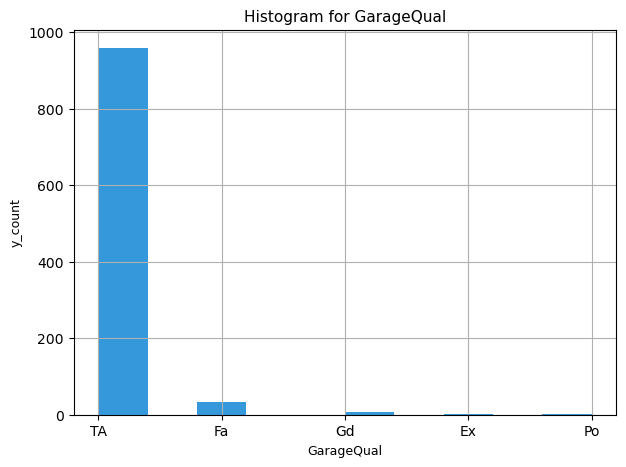

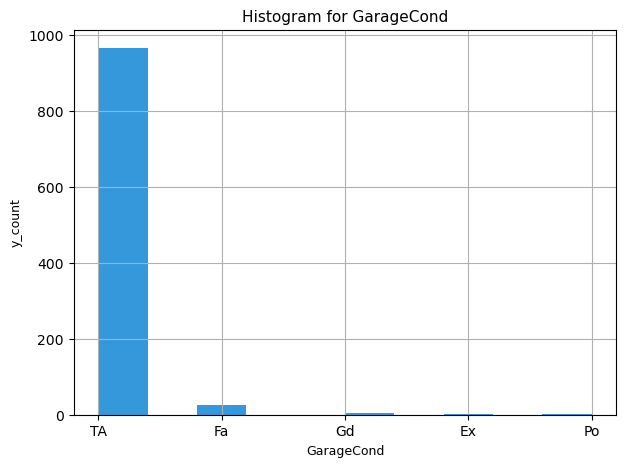

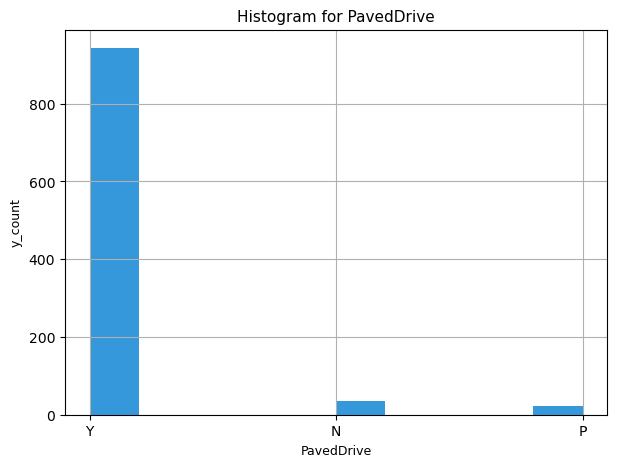

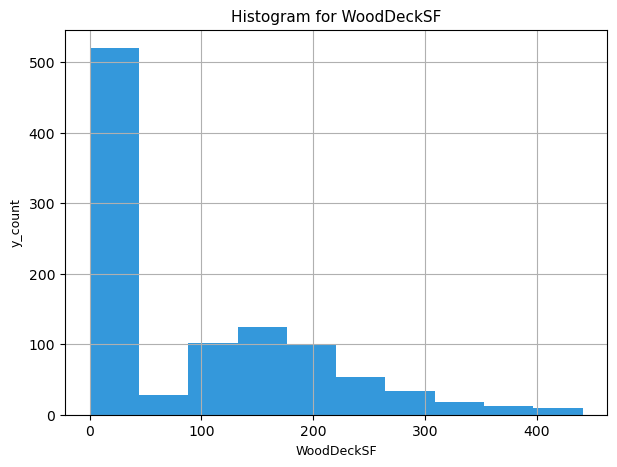

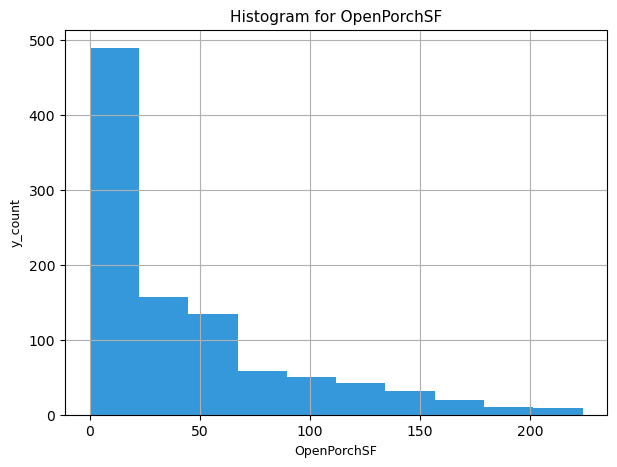

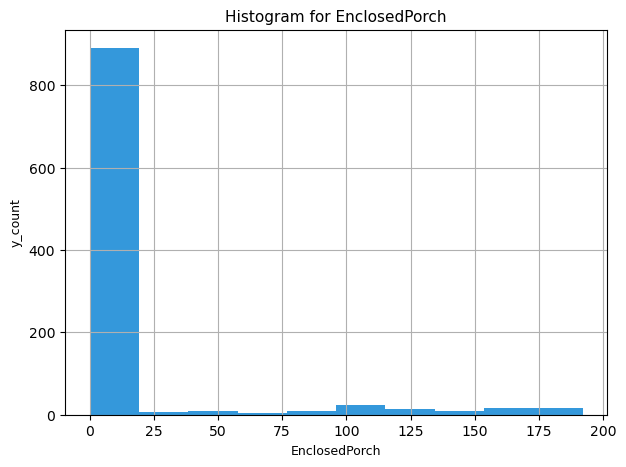

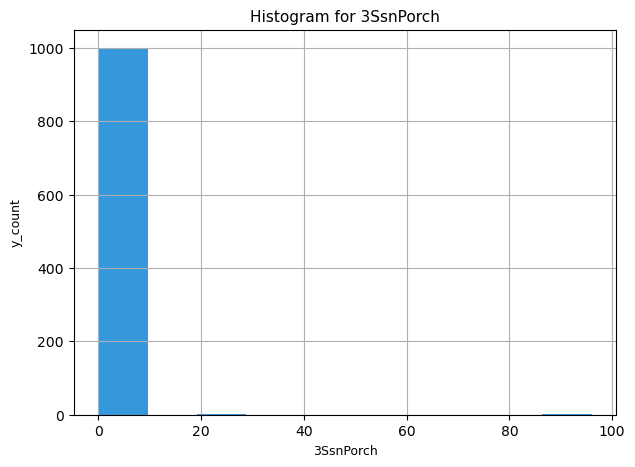

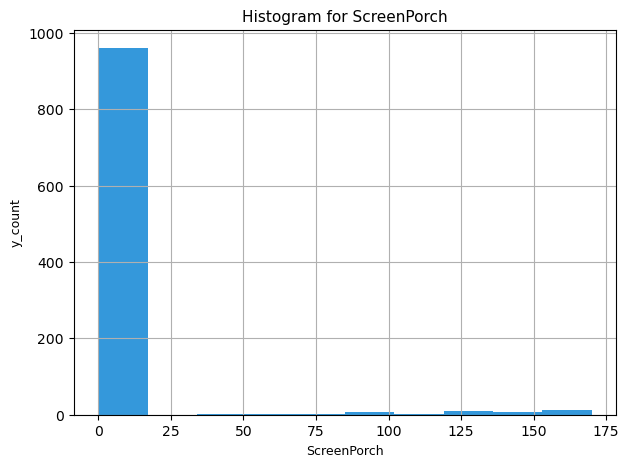

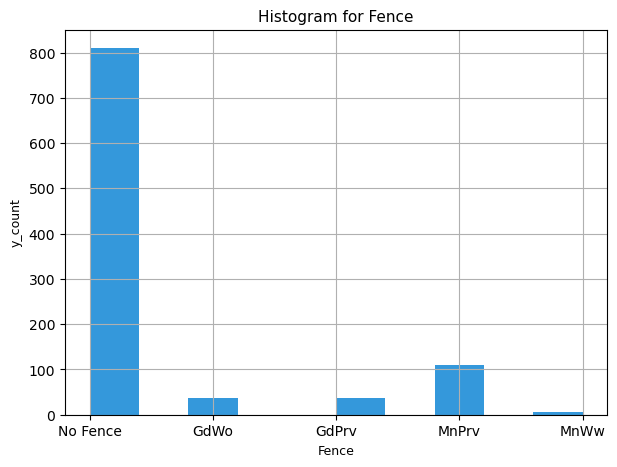

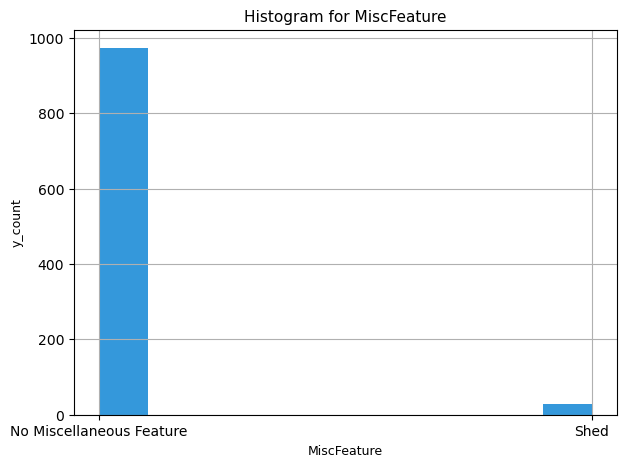

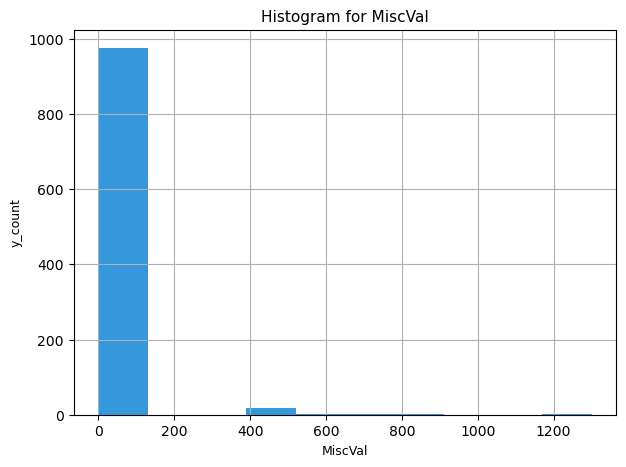

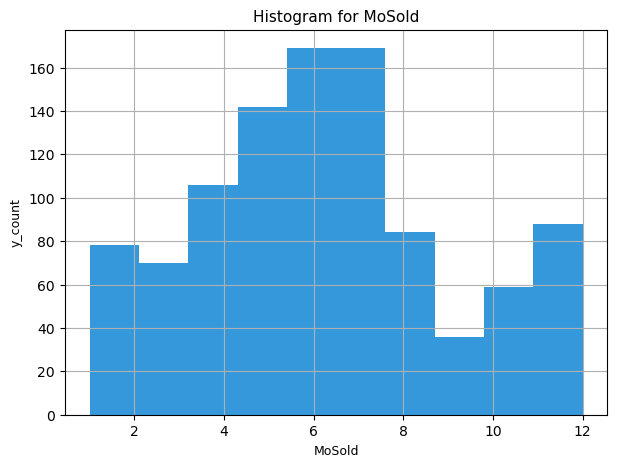

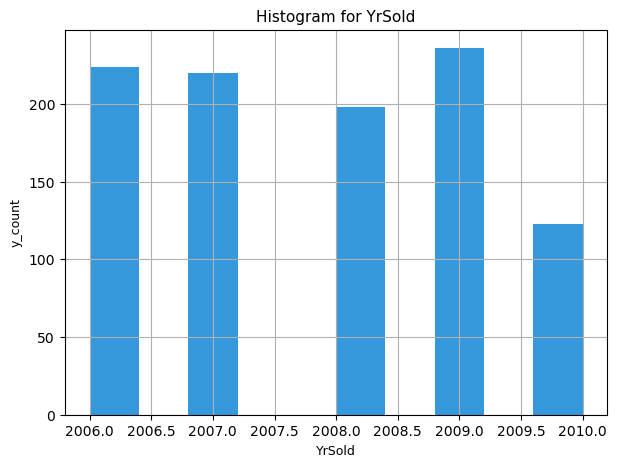

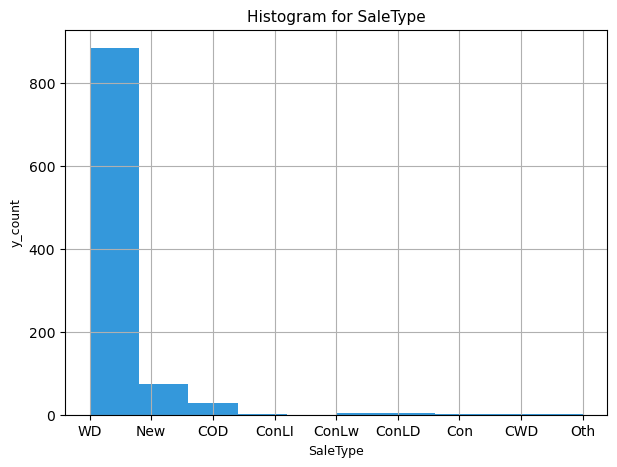

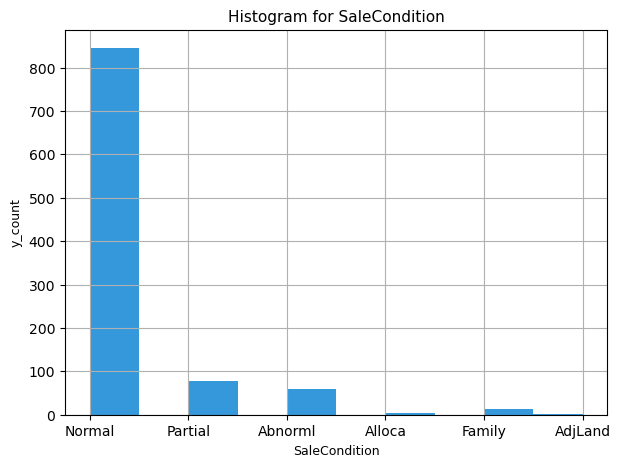

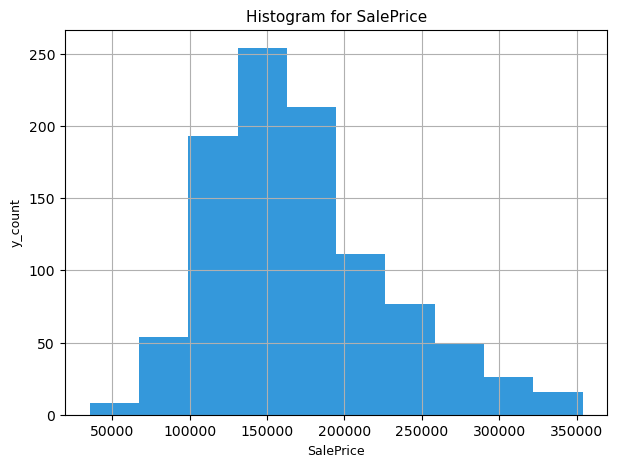

In [141]:
for column in col_rps:
    plt_rp.figure(figsize=(7, 5))
    df_rp[column].hist(color='#3498db') 
    plt_rp.title(f'Histogram for {column}', fontsize=11)
    plt_rp.xlabel(column, fontsize=9)
    plt_rp.ylabel('y_count', fontsize=9)
    plt_rp.show()

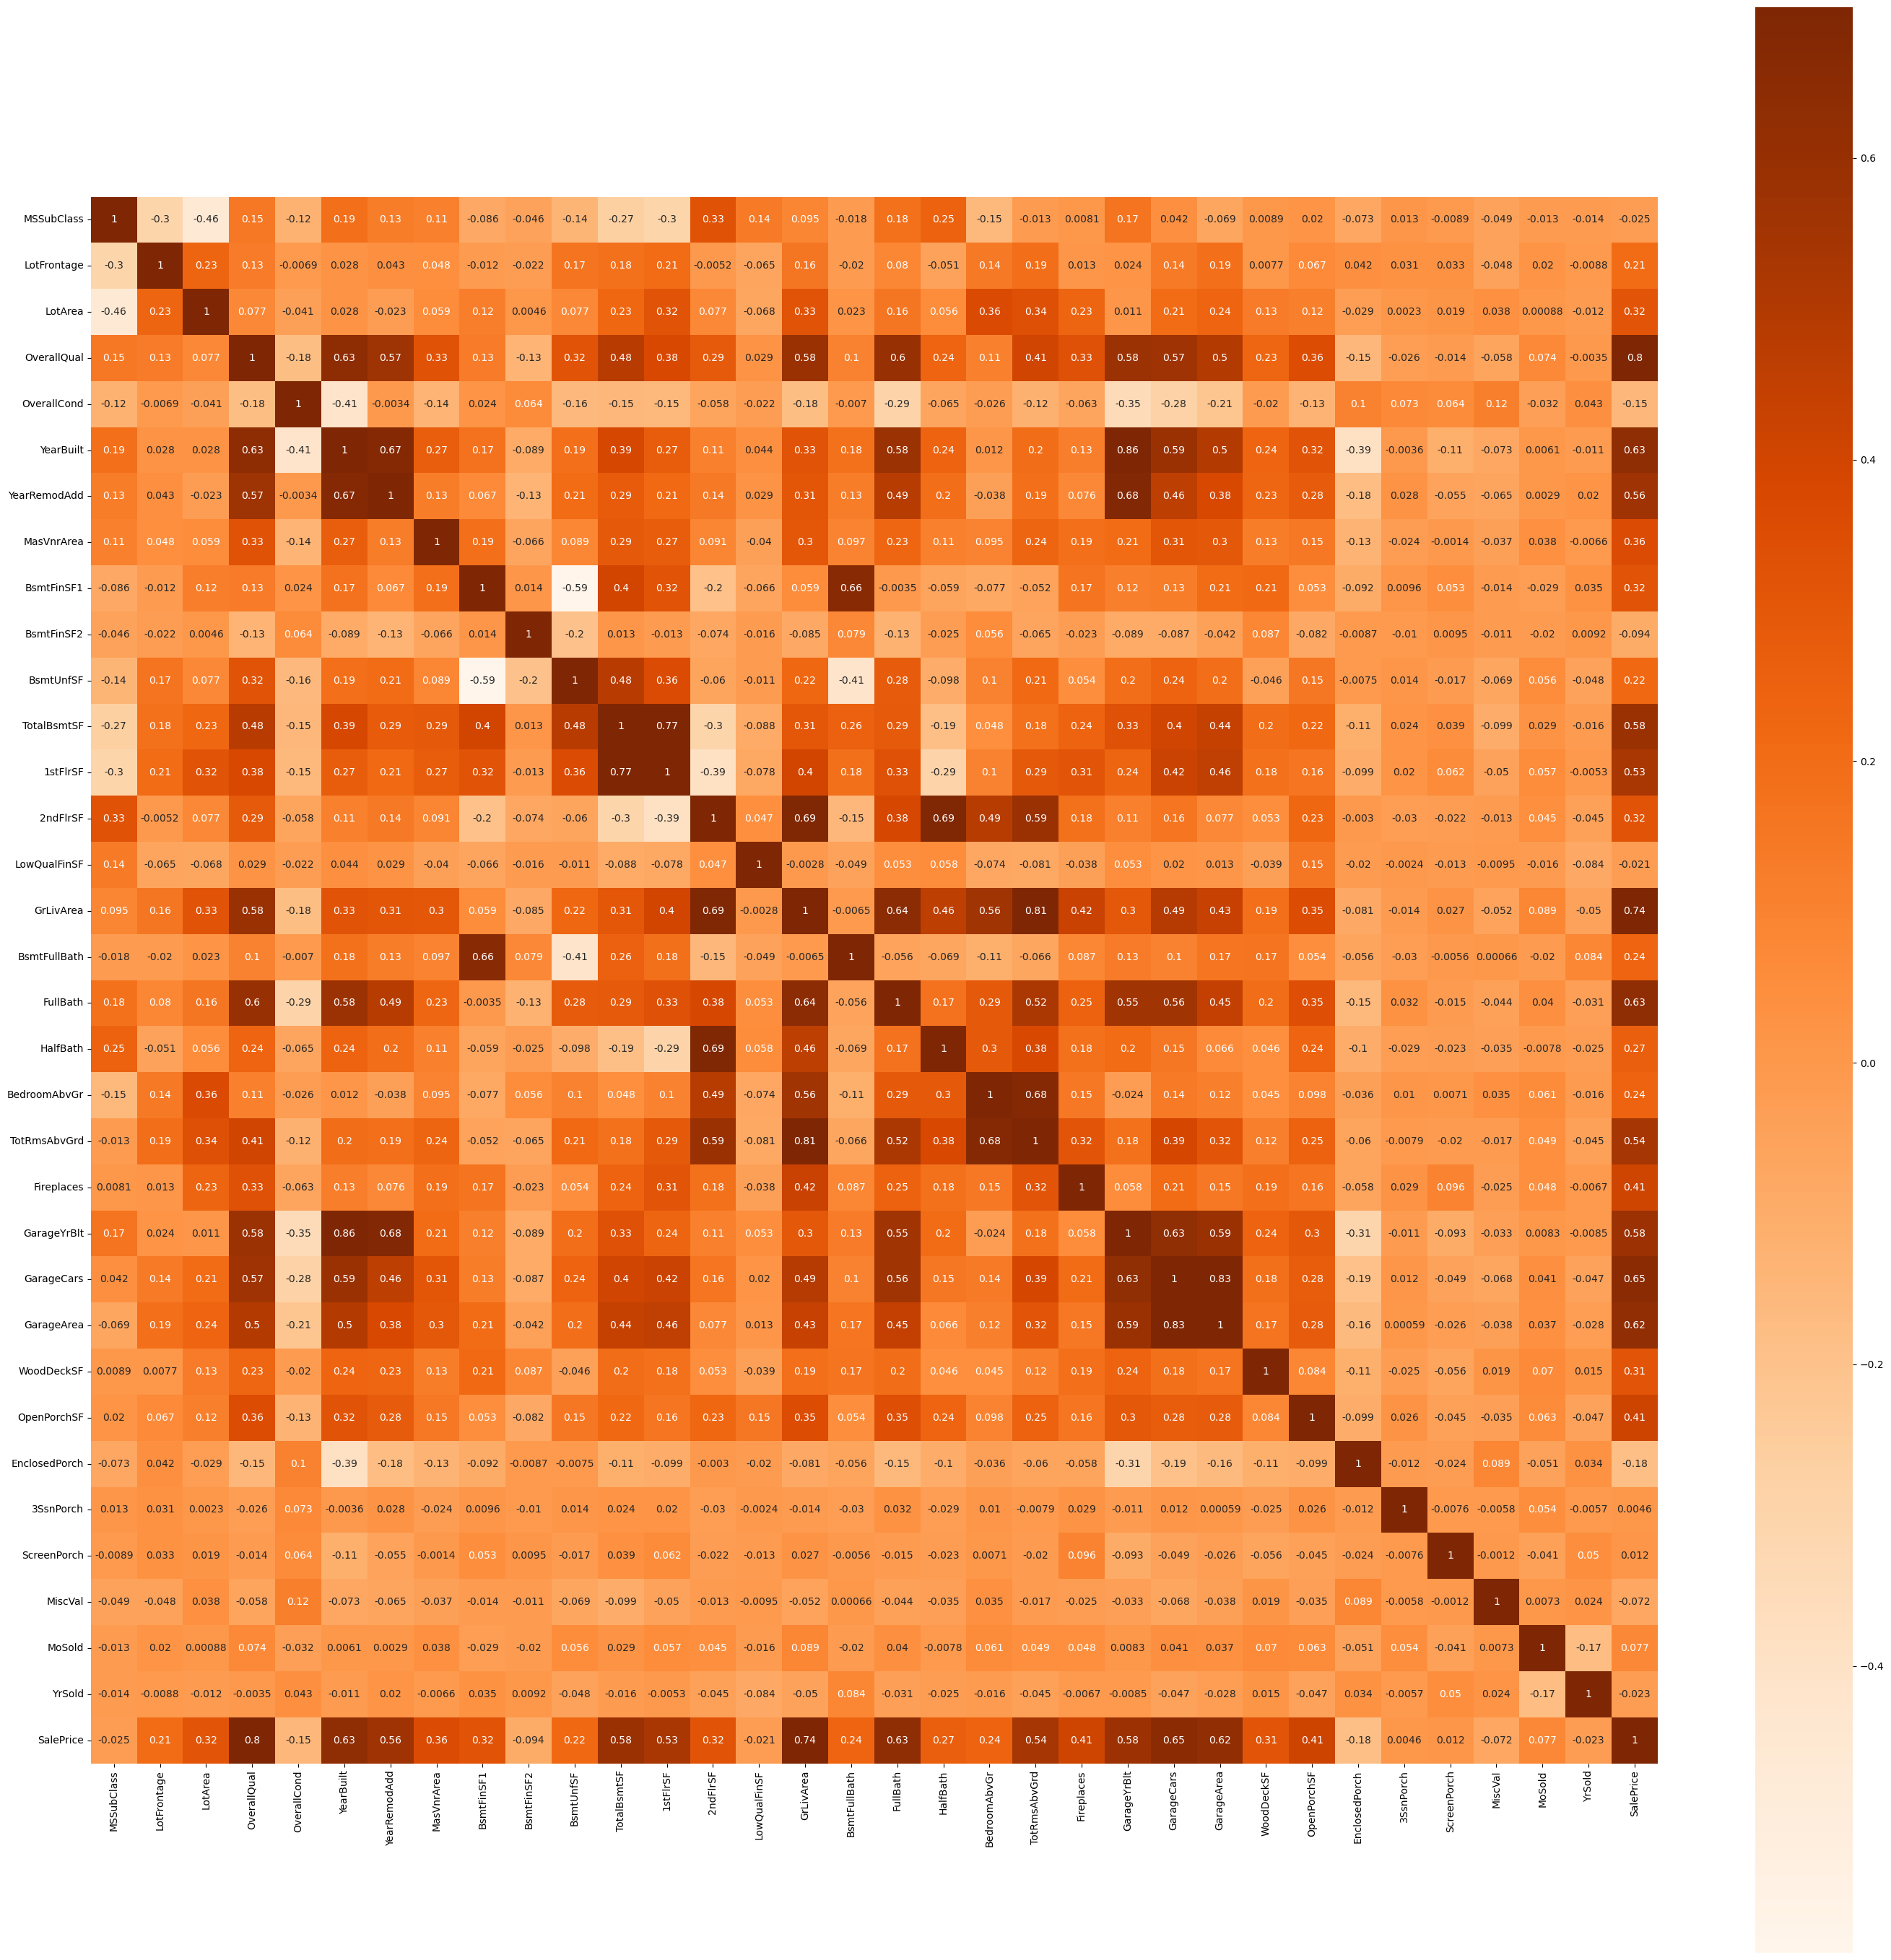

In [142]:
plt_rp.figure(figsize=(35, 35))

sns_rp.heatmap(
    df_rp.select_dtypes('number').corr(),  
    vmax=0.7, 
    annot=True,  
    square=True, 
    cmap='Oranges'  
)

plt_rp.show()


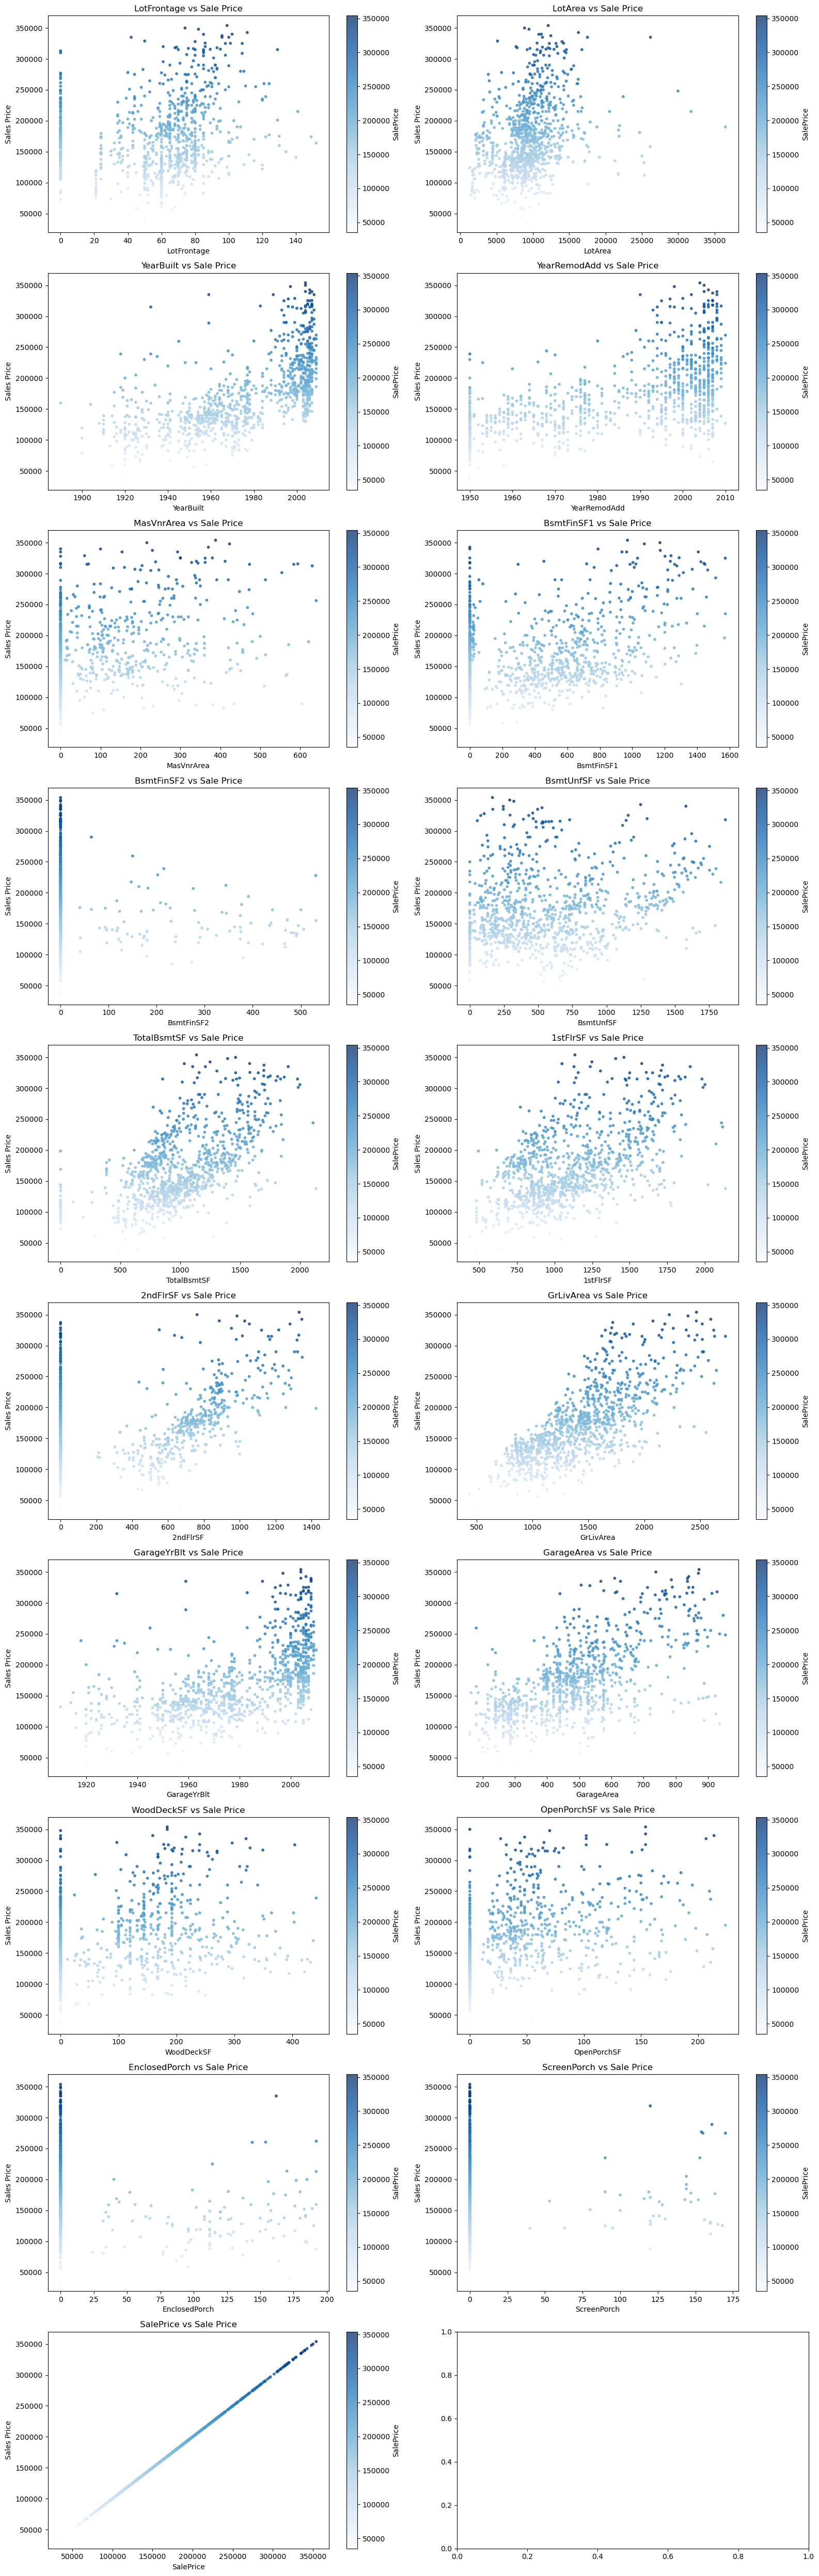

In [143]:
def plot_numeric_col_with_price_rp(ax_rp, x):
    scatter = ax_rp.scatter(x=df_rp[x], y=df_rp['SalePrice'], c=df_rp['SalePrice'], cmap='Blues', alpha=0.75, s=10)
    ax_rp.set(xlabel=x, ylabel='Sales Price', title=f'{x} vs Sale Price')
    plt_rp.colorbar(scatter, ax=ax_rp, label='SalePrice')

selected_columns_rp = [column for column in df_rp.select_dtypes('number').columns if df_rp[column].nunique() > 16]

num_rows_rp = math.ceil(len(selected_columns_rp) / 2)

fig, axes = plt_rp.subplots(num_rows_rp, 2, figsize=(16, 5 * num_rows_rp))
axes = axes.flatten()

for axlen, column in enumerate(selected_columns_rp):
    if axlen >= len(axes):
        break
    plot_numeric_col_with_price_rp(axes[axlen], column)

plt_rp.tight_layout()
plt_rp.show()


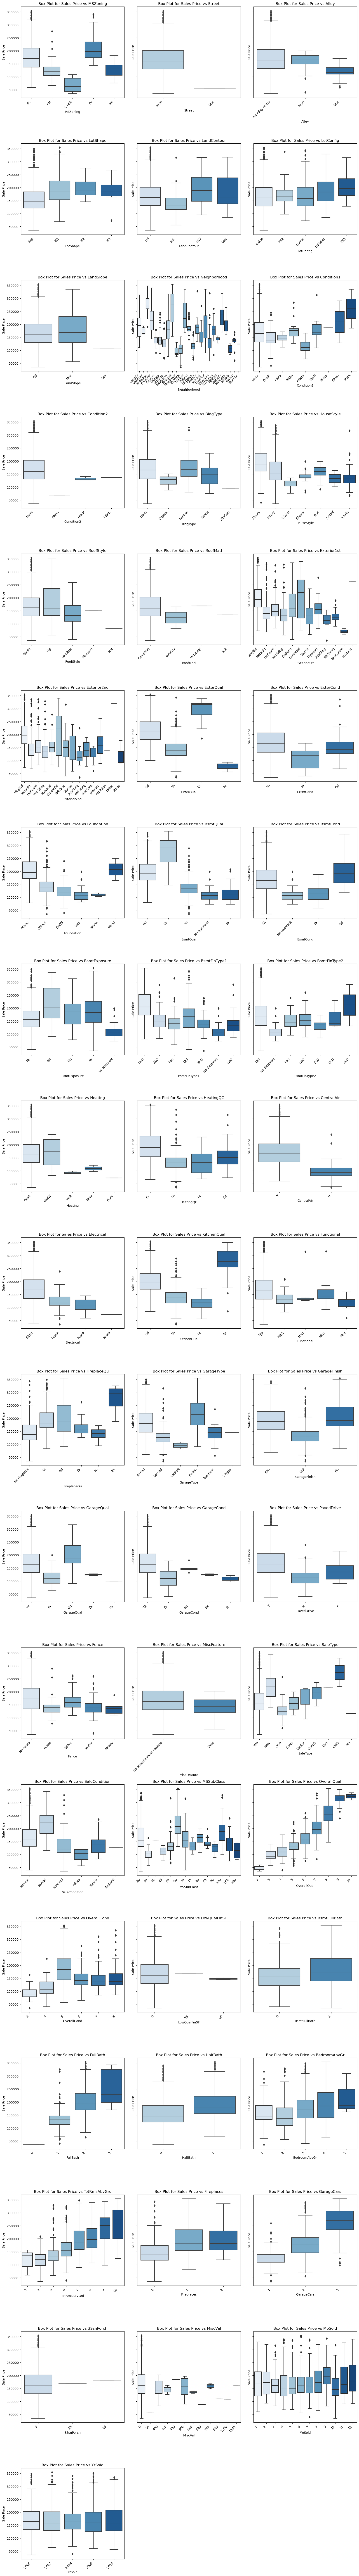

In [144]:
def box_plot_categorical_column_with_price(x, ax_rp):
    sns_rp.boxplot(x=x, y='SalePrice', data=df_rp, ax=ax_rp, palette='Blues')
    ax_rp.set_xlabel(x)
    ax_rp.set_ylabel('Sale Price')
    ax_rp.set_xticklabels(ax_rp.get_xticklabels(), rotation=46, ha='right')
    ax_rp.set_title(f'Box Plot for Sales Price vs {x}')

columns = df_rp.select_dtypes(exclude='number').columns.tolist()
for c in df_rp.select_dtypes('number').columns.tolist():
    if df_rp[f'{c}'].nunique() <= 16:
        columns.append(c)
        
num_columns = 3
num_rows = (len(columns) + num_columns - 1) // num_columns
fig, axes = plt_rp.subplots(num_rows, num_columns, figsize=(16, 6 * num_rows), sharey=True)
axes = axes.flatten()
for num, column in enumerate(columns):
    box_plot_categorical_column_with_price(column, axes[num])
for temp in range(len(columns), num_rows * num_columns):
    fig.delaxes(axes[temp])

plt_rp.tight_layout()
plt_rp.show()

# Preprocessing
## Ecoding the data

In [145]:
df_rp = pd_rp.get_dummies(df_rp,dtype=float,drop_first=True)

## Split the data

In [146]:
df_rp.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
5           60         84.0    14260            8            5       2000   
7           20         75.0    10084            8            5       2004   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           2003       196.0         706           0        150          856   
2           1976         0.0         978           0        284         1262   
3           2002       162.0         486           0        434          920   
5           2000       350.0         655           0        490         1145   
7           2005       186.0        1369           0        317         1686   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  \
Id                                                                        
1        856       854             0       1710             1         2   
2       1262         0             0       1262             0         2   
3        920       866             0       1786             1         2   
5       1145      1053             0       2198             1         2   
7       1694         0             0       1694             1         2   

    HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
Id                                                                              
1          1             3             8           0       2003.0           2   
2          0             3             6           1       1976.0           2   
3          1             3             6           1       2001.0           2   
5          1             4             9           1       2000.0           3   
7          0             3             7           1       2004.0           2   

    GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                  
1          548           0           61              0          0   
2          460         298            0              0          0   
3          608           0           42              0          0   
5          836         192           84              0          0   
7          636         255           57              0          0   

    ScreenPorch  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  \
Id                                                                              
1             0        0       2    2008     208500          0.0          0.0   
2             0        0       5    2007     181500          0.0          0.0   
3             0        0       9    2008     223500          0.0          0.0   
5             0        0      12    2008     250000          0.0          0.0   
7             0        0       8    2007     307000          0.0          0.0   

    MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No Alley Acess  Alley_Pave  \
Id                                                                            
1           1.0          0.0          1.0                   1.0         0.0   
2           1.0          0.0          1.0                   1.0         0.0   
3           1.0          0.0          1.0                   1.0         0.0   
5           1.0          0.0          1.0                   1.0         0.0   
7           1.0          0.0          1.0                   1.0         0.0   

    LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
Id                                                              
1            0.0           0.0           1.0              0.0   
2       

In [147]:
target_col = df_rp.columns.get_loc('SalePrice')
X = df_rp.iloc[:, [col_rp for col_rp in range(df_rp.shape[1]) if col_rp != target_col]].values
y = df_rp.iloc[:,target_col].values

# Apply Standardization on the data

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=256) 

In [149]:
X_train_nstd = X_train.copy()
X_test_nstd = X_test.copy()
y_train_nstd = y_train.copy()

X_train_xg= X_train.copy()
X_test_xg=X_test.copy()
y_train_xg= y_train.copy()
y_test_xg=y_test.copy()

sc_X = StandardScaler()
X_train[:, :34] = sc_X.fit_transform(X_train[:, :34])
X_test[:, :34] = sc_X.transform(X_test[:, :34])
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).flatten()

# Multi-Linear Regression
# Train the model

In [150]:
multi_lr_rp = LinearRegression()
multi_lr_rp.fit(X_train_nstd, y_train_nstd)

LinearRegression()

In [151]:
# Printing Training and Testing sets R2 and MSE Scores
def print_scores(r2_train_rp, r2_test_rp, mse_train_rp, mse_test_rp, algo_rp):
    print("R2 Train Score using {}: {}".format(algo_rp, r2_train_rp))
    print("R2 Test Score using {} : {}".format(algo_rp, r2_test_rp))
    print("Mean Squared Error of Train using {} : {}".format(algo_rp, mse_train_rp))
    print("Mean Squared Error of Test using {} : {}".format(algo_rp, mse_test_rp))


In [152]:
y_pred = multi_lr_rp.predict(X_test_nstd)
y_train_pred = multi_lr_rp.predict(X_train_nstd)
r2_lr_train_rp = r2_score(y_train_nstd, y_train_pred)
r2_lr_test_rp = r2_score(y_test, y_pred.reshape(-1,1))
mse_lr_train_rp = mean_squared_error(y_train_nstd, y_train_pred)
mse_lr_test_rp = mean_squared_error(y_test, y_pred.reshape(-1,1))

print_scores(r2_lr_train_rp,r2_lr_test_rp,mse_lr_train_rp,mse_lr_test_rp,"Linear Regression")


R2 Train Score using Linear Regression: 0.9491941900302114
R2 Test Score using Linear Regression : 0.8967704699231831
Mean Squared Error of Train using Linear Regression : 165463735.30246514
Mean Squared Error of Test using Linear Regression : 352617475.9582878


# Polynomial Regression
## Training the model

In [153]:
poly_reg_rp = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg_rp.fit_transform(X_train)
X_test_poly = poly_reg_rp.transform(X_test)
poly_lr_rp = LinearRegression()
poly_lr_rp.fit(X_train_poly, y_train)

LinearRegression()

# Evaluation the model

In [154]:
y_pred = poly_lr_rp.predict(X_test_poly)
y_train_pred = poly_lr_rp.predict(X_train_poly)
r2_poly_train_rp = r2_score(y_train,y_train_pred)
r2_poly_test_rp = r2_score(y_test,sc_y.inverse_transform(y_pred.reshape(-1,1)))
mse_poly_train_rp = mean_squared_error(y_train, y_train_pred)
mse_poly_test_rp = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))

print_scores(r2_poly_train_rp, r2_poly_test_rp, mse_poly_train_rp, mse_poly_test_rp, "Polynomial Regression")


R2 Train Score using Polynomial Regression: 1.0
R2 Test Score using Polynomial Regression : 0.8253451949027779
Mean Squared Error of Train using Polynomial Regression : 8.631847175963858e-28
Mean Squared Error of Test using Polynomial Regression : 596596114.4213339


# Random Forest
## Training the model

### RF with estimators = 75

In [155]:
rdm_frst_rps_75 = RandomForestRegressor(n_estimators = 75)
rdm_frst_rps_75.fit(X_train, y_train)

RandomForestRegressor(n_estimators=75)

### RF with estimators = 100

In [156]:
rdm_frst_rps_100 = RandomForestRegressor(n_estimators = 100)
rdm_frst_rps_100.fit(X_train, y_train)

RandomForestRegressor()

### RF with estimators = 125

In [157]:
rdm_frst_rps_125 = RandomForestRegressor(n_estimators = 125)
rdm_frst_rps_125.fit(X_train, y_train)

RandomForestRegressor(n_estimators=125)

# Random Forest
## Evaluation the model

In [158]:
y_pred = rdm_frst_rps_100.predict(X_test)
y_train_pred = rdm_frst_rps_100.predict(X_train)
r2_frst_train_rp = r2_score(y_train, y_train_pred)
r2_frst_test_rp = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
mse_frst_train_rp= mean_squared_error(y_train, y_train_pred)
mse_frst_test_rp = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))

print_scores(r2_frst_train_rp, r2_frst_test_rp, mse_frst_train_rp, mse_frst_test_rp, "Random Forest Regression (100)")

R2 Train Score using Random Forest Regression (100): 0.9834267646891539
R2 Test Score using Random Forest Regression (100) : 0.876744889688229
Mean Squared Error of Train using Random Forest Regression (100) : 0.016573235310846136
Mean Squared Error of Test using Random Forest Regression (100) : 421022026.010924


In [159]:
y_pred = rdm_frst_rps_75.predict(X_test)
y_train_pred = rdm_frst_rps_75.predict(X_train)
r2_frst_train_75 = r2_score(y_train, y_train_pred)
r2_frst_test_75 = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
mse_frst_train_75 = mean_squared_error(y_train, y_train_pred)
mse_frst_test_75 = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))

print_scores(r2_frst_train_75, r2_frst_test_75, mse_frst_train_75, mse_frst_test_75, "Random Forest Regression (75)")

R2 Train Score using Random Forest Regression (75): 0.9826005742915324
R2 Test Score using Random Forest Regression (75) : 0.8805141613357595
Mean Squared Error of Train using Random Forest Regression (75) : 0.01739942570846763
Mean Squared Error of Test using Random Forest Regression (75) : 408146727.1156918


In [160]:
y_pred = rdm_frst_rps_125.predict(X_test)
y_train_pred = rdm_frst_rps_125.predict(X_train)
r2_frst_train_rp = r2_score(y_train, y_train_pred)
r2_frst_test_rp = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
mse_frst_train_rp = mean_squared_error(y_train, y_train_pred)
mse_frst_test_rp = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))

print_scores(r2_frst_train_rp, r2_frst_test_rp, mse_frst_train_rp, mse_frst_test_rp, "Random Forest Regression (125)")

R2 Train Score using Random Forest Regression (125): 0.9834972738384505
R2 Test Score using Random Forest Regression (125) : 0.878074760293716
Mean Squared Error of Train using Random Forest Regression (125) : 0.01650272616154943
Mean Squared Error of Test using Random Forest Regression (125) : 416479376.09370524


# We have altered the n_estimators in the Random Forest and hence we can see that it gives best result with any value out of [75,100,125]

# Linear SVR
## Training the model

In [161]:
svr_lrp_rs = SVR(kernel = 'linear')
svr_lrp_rs.fit(X_train, y_train)

SVR(kernel='linear')

## Evaluation the model

In [162]:
y_pred = svr_lrp_rs.predict(X_test)
y_train_pred = svr_lrp_rs.predict(X_train)
r2_svr_lr_train_rp = r2_score(y_train, y_train_pred)
r2_svr_lr_test_rp = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
mse_svr_lr_train_rp = mean_squared_error(y_train, y_train_pred)
mse_svr_lr_test_rp = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))

print_scores(r2_svr_lr_train_rp, r2_svr_lr_test_rp, mse_svr_lr_train_rp, mse_svr_lr_test_rp, "Support Vector Regression")

R2 Train Score using Support Vector Regression: 0.9439305022854688
R2 Test Score using Support Vector Regression : 0.9138355058165617
Mean Squared Error of Train using Support Vector Regression : 0.05606949771453119
Mean Squared Error of Test using Support Vector Regression : 294325726.69445837


# SVR using Radial Basis Function

In [163]:
svr_rbf_rp = SVR(kernel = 'rbf')
svr_rbf_rp.fit(X_train, y_train)

SVR()

## Evaluation the model

In [164]:
y_pred = svr_rbf_rp.predict(X_test)
y_train_pred = svr_rbf_rp.predict(X_train)
r2_svr_train_rp = r2_score(y_train, y_train_pred)
r2_svr_test_rp = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
mse_svr_train_rp = mean_squared_error(y_train, y_train_pred)
mse_svr_test_rp = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))

print_scores(r2_svr_train_rp, r2_svr_test_rp, mse_svr_train_rp, mse_svr_test_rp, "Support Vector Regression_rbf")

R2 Train Score using Support Vector Regression_rbf: 0.9677502574058094
R2 Test Score using Support Vector Regression_rbf : 0.9005401855006185
Mean Squared Error of Train using Support Vector Regression_rbf : 0.032249742594190514
Mean Squared Error of Test using Support Vector Regression_rbf : 339740660.6612818


# Here we have changed the kernel from linear to RBF and hence found a significant increase in the model performance

In [165]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

param_grid_rs = {
    'learning_rate': [ 0.1, 0.2, 0.3, 0.4],
    'gamma': [0.01, 0.1, 0.2, 0.3, 0.4]
}
xgb = XGBRegressor()

grid_search_rp = GridSearchCV(estimator=xgb, param_grid=param_grid_rs, scoring='neg_mean_squared_error', cv=5)
grid_search_rp.fit(X_train_xg, y_train_xg)

best_params = grid_search_rp.best_params_
print("Best Hyperparameters:", best_params)
y_pred = grid_search.best_estimator_.predict(X_test_xg)

Best Hyperparameters: {'gamma': 0.01, 'learning_rate': 0.1}


# XGBoost Regressor
## Training the model
# We can clearly see that out of the given values, we have tuned the model and found the best combination as gamma(0.01) and learning rate(0.1)

In [166]:
xgb_rp = XGBRegressor(learning_rate=0.1,gamma=0.01)
xgb_rp.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [167]:
y_pred = xgb_rp.predict(X_test)
y_train_pred = xgb_rp.predict(X_train)
r2_xgb_train_rp = r2_score(y_train, y_train_pred)
r2_xgb_test_rp = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
mse_xgb_train_rp = mean_squared_error(y_train, y_train_pred)
mse_xgb_test_rp = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))

print_scores(r2_xgb_train_rp, r2_xgb_test_rp, mse_xgb_train_rp, mse_xgb_test_rp, "XGBoost")

R2 Train Score using XGBoost: 0.9960759723139573
R2 Test Score using XGBoost : 0.8813379856508698
Mean Squared Error of Train using XGBoost : 0.00392402768604268
Mean Squared Error of Test using XGBoost : 405332659.76102


# K-NN Model 
## Creating and train the model

In [168]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

knn_test = KNeighborsRegressor(n_neighbors=500)
knn_test.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

r2_knn_train_rp = r2_score(y_train, y_train_pred)
r2_knn_test_rp = r2_score(y_test, y_pred)
mse_knn_train_rp = mean_squared_error(y_train, y_train_pred)
mse_knn_test_rp = mean_squared_error(y_test, y_pred)

print_scores(r2_knn_train_rp, r2_knn_test_rp, mse_knn_train_rp, mse_knn_test_rp , "KNN")

R2 Train Score using KNN: 0.8902326710346942
R2 Test Score using KNN : -8.504651413383005
Mean Squared Error of Train using KNN : 0.10976732896530578
Mean Squared Error of Test using KNN : 32466545074.42308


In [169]:
y_pred = knn_test.predict(X_test)
y_train_pred = knn_test.predict(X_train)
r2_knn_train_rp = r2_score(y_train, y_train_pred)
r2_knn_test_rp = r2_score(y_test, y_pred)
mse_knn_train_rp = mean_squared_error(y_train, y_train_pred)
mse_knn_test_rp = mean_squared_error(y_test, y_pred)

print_scores(r2_knn_train_rp, r2_knn_test_rp, mse_knn_train_rp, mse_knn_test_rp , "KNN(500)")

R2 Train Score using KNN(500): 0.4666241814351054
R2 Test Score using KNN(500) : -8.504667145091746
Mean Squared Error of Train using KNN(500) : 0.5333758185648946
Mean Squared Error of Test using KNN(500) : 32466598811.715347


# Here we can see that when the neighbours are more i.e. 500 we are getting model with less performance as compared to model which has k=5.

In [170]:
models = pd_rp.DataFrame({
    'Model': [
        'Multiple Linear Regression','Polynomial Regression',
        'Random Forest', 'Support Vector Regression','Linear Support Vector Regression','XGBoost','KNN'
    ],
    'Training R2 Score': [
        r2_lr_train_rp,r2_poly_train_rp,r2_frst_train_75,r2_svr_train_rp,r2_svr_lr_train_rp,r2_xgb_train_rp, r2_knn_train_rp
    ],
    'Training Mean Square Error': [
       mse_lr_train_rp,mse_poly_train_rp,mse_frst_train_75,mse_svr_train_rp,mse_svr_lr_train_rp,mse_xgb_train_rp, mse_knn_train_rp
    ],
    'Testing R2 Score': [
        r2_lr_test_rp,r2_poly_test_rp,r2_frst_test_75,r2_svr_test_rp,r2_svr_lr_test_rp,r2_xgb_test_rp , r2_knn_test_rp
    ],
    'Testing Mean Square Error': [
       mse_lr_test_rp,mse_poly_test_rp,mse_frst_test_75,mse_svr_test_rp,mse_svr_lr_test_rp,mse_xgb_test_rp, mse_knn_test_rp
    ]
})

In [171]:
models.sort_values(by='Testing R2 Score', ascending=False).style.background_gradient(
        cmap='Blues')

In [172]:
y_pred = svr_lrp_rs.predict(X_test)
y_train_pred = svr_lrp_rs.predict(X_train)
r2_svr_lr_train_rp = r2_score(y_train, y_train_pred)
r2_svr_lr_test_rp = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
mse_svr_lr_train_rp = mean_squared_error(y_train, y_train_pred)
mse_svr_lr_test_rp = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))

print_scores(r2_svr_lr_train_rp, r2_svr_lr_test_rp, mse_svr_lr_train_rp, mse_svr_lr_test_rp, "Support Vector Regression")

ids = np.arange(1, len(y_test) + 1)
csv_file_path = "model_scores.csv"

with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    
    for i, saleprice in zip(ids, sc_y.inverse_transform(y_pred.reshape(-1,1))):
        writer.writerow([i, saleprice[0]])
    
print(f"Scores saved to {csv_file_path}")


R2 Train Score using Support Vector Regression: 0.9439305022854688
R2 Test Score using Support Vector Regression : 0.9138355058165617
Mean Squared Error of Train using Support Vector Regression : 0.05606949771453119
Mean Squared Error of Test using Support Vector Regression : 294325726.69445837
Scores saved to model_scores.csv
